## <font color=RoyalBlue>Management/Research Question<font>

**In layman’s terms, what is the management/research question of interest, and why would anyone care?**

The management and research question of interest is to predict the zillow median estimated home value in next few years.The aim of this project is to predict the median home value using Machine learning algorithms Linear regression model, Decision tree regressor like XGBoost, Random forest and neural net like LSTM considering factors such as Mortgage rate per year, Crime rate in that county, public schools, unemployment rate in state.

###<font color='darkblue'>**Dataset**</font> <br/>
Zillow Economics Dataset - https://www.kaggle.com/zillow/zecon <br/>
Crime rate Dataset — US Crime rates by County
https://www.kaggle.com/mikejohnsonjr/united-states-crime-rates-by-county <br/>
US Unemployment Rate - U.S. Bureau of Labor Statistics site and can be found at: https://www.bls.gov/web/laus.supp.toc.htm. Employment status of the civilian noninstitutional population, January 1976 to date, seasonally adjusted (ZIP) https://www.bls.gov/web/laus/ststdsadata.zip The file is titled as “ststdsadata.csv” and can be extracted from the zip folder. The U.S. Unemployment data includes total population, employable population, the number of employed and unemployed, the employment rate and unemployment rate by month in each U.S. state. This is published until December 2020 and we will be using this data from January 2020 – December 2020. <br/>
USA Public Schools - https://www.kaggle.com/carlosaguayo/usa-public-schools <br/>
Mortgage Rates - https://fred.stlouisfed.org/series/MORTGAGE30US <br/>

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=24657edb51b3cfbfbde78f7fbf9a1d10248f8aad76a50b0a55d1490c2e064b02
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
# ------------------------------------------------------------
# Northwestern University 
# MSDS - 422 Group 1
# Author - Swati Sundar, Srivatsan Chakravarti, Taylor Stevenson, Vybhav Hirasave
# Project - United states median house value prediction
# -------------------------------------------------------------
# S1 Run SetUp Script to Install Packages 
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import matplotlib as mpl
import plotly.express as px
import matplotlib.cbook as cbook
from matplotlib import cm
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import sys
from scipy import stats
from scipy.stats import iqr
import os # Operation System
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import KFold, GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, cross_val_predict, learning_curve
from numpy import mean
from numpy import std
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, average_precision_score, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from math import sqrt  # for root mean-squared error calculation
import warnings
warnings.filterwarnings("ignore")

# set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sklearn
import tensorflow as tf
from datetime import datetime
from __future__ import division, print_function, unicode_literals
#These below are used in image processing
import cv2
import zipfile
from PIL import Image
from skimage.transform import resize, rotate, SimilarityTransform, warp
from skimage.filters import sobel
import glob
#Below used for TensorBoard data Visualization
#from time import time
#from keras.callbacks import TensorBoard
# Python ≥3.5 is required
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
#Connect to google drive and set the working directory
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Project/
!pwd
#!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/drive/MyDrive/MSDS 422/Project/dataset/"

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Project/'
/content
/content
Working Directory
/content


In [4]:
#Load the Zillow Data  dictionary.
# few difficulties when working with this dataset is it does not specify every dataset included in the Zillow Economics dataset. 
# No details about the various csv files and how they are related to each other and the details about different attributes.
df_data_dict = pd.read_csv(work_dir + "zillow/DataDictionary.csv",sep=";", encoding='cp1252')

df_data_dict

,"Variable,Definition"
0,"AgeOfInventory,""Each Wednesday, age of invento..."
1,"DaysOnZillow,""The median days on market of hom..."
2,"HomesSoldAsForeclosuresRatio,""The number of ho..."
3,"InventorySeasonallyAdjusted,A seasonally adjus..."
4,"InventoryRaw,Median of weekly snapshot of for-..."
5,"MedianListingPricePerSqft,Median of list price..."
6,"MedianListingPrice,Median of the list price (o..."
7,"MedianPctOfPriceReduction,Median of the percen..."
8,"MedianPriceCutDollar,Median of the price reduc..."
9,"MedianRentalPricePerSqft,Median of the rental ..."


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# load Zillow State time series dataset
df_zillow_states = pd.read_csv(work_dir + "zillow/State_time_series.csv", parse_dates=True)

#Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#and the data types for each variable
df_zillow_states.info()

# Use the head() method to inspect the first five (or more) rows of the data
df_zillow_states.head()

df_zillow_states.shape

# Summary Statistics
df_zillow_states.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 82 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           13212 non-null  object 
 1   RegionName                                                     13212 non-null  object 
 2   DaysOnZillow_AllHomes                                          4845 non-null   float64
 3   InventorySeasonallyAdjusted_AllHomes                           4896 non-null   float64
 4   InventoryRaw_AllHomes                                          4896 non-null   float64
 5   MedianListingPricePerSqft_1Bedroom                             3586 non-null   float64
 6   MedianListingPricePerSqft_2Bedroom                             4534 non-null   float64
 7   MedianListingPricePerSqft_3Bedroom                        

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


(13212, 82)

,count,mean,std,min,25%,50%,75%,max
DaysOnZillow_AllHomes,4845.0,110.117363,27.474195,49.250000,90.250000,108.500000,126.750000,251.625000
InventorySeasonallyAdjusted_AllHomes,4896.0,33292.662786,34926.704422,972.000000,9828.500000,21712.500000,47453.000000,260687.000000
InventoryRaw_AllHomes,4896.0,33299.013685,35014.163714,911.000000,9756.250000,21289.000000,46891.000000,268055.000000
MedianListingPricePerSqft_1Bedroom,3586.0,182.470536,99.809488,57.142857,125.688504,162.754210,202.629803,627.551020
MedianListingPricePerSqft_2Bedroom,4534.0,135.490657,74.250919,60.000000,92.158518,121.300723,152.242031,550.639135
...,...,...,...,...,...,...,...,...
ZRI_AllHomes,4254.0,1321.329807,371.006175,799.000000,1047.000000,1210.000000,1474.000000,2690.000000
ZRI_AllHomesPlusMultifamily,4336.0,1318.055581,368.783157,799.000000,1036.000000,1210.000000,1477.000000,2653.000000
ZriPerSqft_AllHomes,4336.0,0.929661,0.284986,0.560000,0.728000,0.862000,1.074000,2.294000
Zri_MultiFamilyResidenceRental,4336.0,1233.050277,369.426763,713.000000,959.750000,1126.000000,1399.500000,2606.000000


In [7]:
# Convert date field to datetime dtype
df_zillow_states.Date=pd.to_datetime(df_zillow_states.Date)
# create a year field
df_zillow_states['year'] = df_zillow_states.Date.dt.year
df_zillow_states=df_zillow_states[['Date','year', 'RegionName','MedianListingPrice_AllHomes', 'DaysOnZillow_AllHomes','Sale_Prices','ZHVI_AllHomes', 'ZHVI_BottomTier','ZHVI_TopTier','ZHVI_MiddleTier']]
df_zillow_states.head()

,Date,year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier
0,1996-04-30,1996,Alabama,NaN,NaN,NaN,79500.0,45600.0,140200.0,79500.0
1,1996-04-30,1996,Arizona,NaN,NaN,NaN,103600.0,67100.0,168700.0,103600.0
2,1996-04-30,1996,Arkansas,NaN,NaN,NaN,64400.0,38400.0,115200.0,64400.0
3,1996-04-30,1996,California,NaN,NaN,NaN,157900.0,95100.0,270600.0,157900.0
4,1996-04-30,1996,Colorado,NaN,NaN,NaN,128100.0,82700.0,209300.0,128100.0


In [8]:
# Load the Mortgage rates dataset based on dates
dfMortgage = pd.read_csv(work_dir + "Mortgage.csv", parse_dates=True)
dfMortgage.info()
dfMortgage.head()

# Convert string to datetime for mortgage dataframe
dfMortgage.Date = pd.to_datetime(dfMortgage.Date, errors='coerce')

# Assign a year column from date in the dataframe
dfMortgage['year'] = dfMortgage.Date.dt.year

#  Assign a month column from date in the dataframe
dfMortgage['month'] = dfMortgage['Date'].dt.month

dfMortgage= dfMortgage[['year','Mortgage']]

#Summarize the avg. mortagage rates by year
dfMortgage_rates=dfMortgage.groupby('year').mean()
dfMortgage_rates.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2605 non-null   object 
 1   Mortgage  2605 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.8+ KB


,Date,Mortgage
0,02-04-1971,7.33
1,09-04-1971,7.31
2,16-04-1971,7.31
3,23-04-1971,7.31
4,30-04-1971,7.29


,Mortgage
year,
2017,3.989808
2018,4.544615
2019,3.935769
2020,3.111698
2021,2.772500


In [9]:
#Load Unemployment rate dataset.
df_unempl =  pd.read_excel(work_dir + "ststdsadata.xlsx",header=[3, 6]) 
df_unempl.head()

FIPS Code     State and area      Period                \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Labor force Labor force.1   
0                NaN                NaN         NaN           NaN   
1                1.0            Alabama      1976.0           1.0   
2                2.0             Alaska      1976.0           1.0   
3                4.0            Arizona      1976.0           1.0   
4                5.0           Arkansas      1976.0           1.0   

  Civilian non-institutional population Civilian labor force  \
                     Unnamed: 4_level_1   Unnamed: 5_level_1   
0                                   NaN                  NaN   
1                             2605000.0            1492409.0   
2                              232000.0             159154.0   
3                             1621000.0             972413.0   
4                             1536000.0             882835.0   

                                                                
  Unnamed: 6_level_1 Labor force Labor force.1     level  rate  
0                NaN         NaN           NaN       NaN   NaN  
1               57.3   1392154.0          53.4  100255.0   6.7  
2               68.6    147809.0          63.7   11345.0   7.1  
3               60.0    872738.0          53.8   99675.0  10.3  
4               57.5    817756.0          53.2   65079.0   7.4

In [10]:
#select only required columns for unemployment dataset
df_unempl.columns = ['fips','RegionName','year','month','total_population','Employable Population','Employable_Population_percentage','Employed','Employed_percentage','Unemployed','Unemployed_rate']

#List of counties to remove not required
counties_to_remove = ['Los Angeles County', 'New York city']

#remove counties from dataframe and keep only states
df_unempl = df_unempl[~df_unempl.RegionName.isin(counties_to_remove)]

df_unempl.shape

(27541, 11)

In [11]:
#load the crime rate dataset into data frame
crime_and_pop_data = pd.read_csv(work_dir + "crime_data_w_population_and_crime_rate.csv")

crime_and_pop_data
original_data = crime_and_pop_data.copy()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,"Ohio County, IN",0.000000,3132,1,4,762,6084,0,2,1,...,0,0,0,2,2,0,0,5994,18,115
3132,"Newton County, MS",0.000000,3133,1,4,1465,21545,3346,3,1,...,0,0,0,4,0,1,0,21689,28,101
3133,"Jerauld County, SD",0.000000,3134,1,4,2424,2108,2108,1,1,...,0,0,0,1,3,1,0,2066,46,73
3134,"Cimarron County, OK",0.000000,3135,1,4,2167,2502,2502,2,2,...,0,0,0,1,2,0,0,2335,40,25


In [12]:
#summary statistics for crime dataset
crime_and_pop_data.describe()
crime_and_pop_data.info()
crime_and_pop_data.head()
crime_and_pop_data.shape
crime_and_pop_data.columns

,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
count,3136.000000,3136.000000,3136.0,3136.0,3136.000000,3.136000e+03,3.136000e+03,3136.000000,3136.000000,3136.000000,...,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3.136000e+03,3136.000000,3136.000000
mean,235.085665,1568.500000,1.0,4.0,1590.655612,9.977578e+04,9.841005e+04,6.201212,5.400510,98.154624,...,26.324936,112.447704,238.644133,660.654337,1923.397959,227.536671,16.765625,1.007329e+05,30.339286,103.628827
std,200.502872,905.429548,0.0,0.0,916.038464,3.198554e+05,3.189017e+05,8.104974,7.532491,8.311058,...,79.309098,666.311425,931.091864,2242.359745,6435.993731,1253.236660,67.970823,3.226566e+05,15.112433,107.987364
min,0.000000,1.000000,1.0,4.0,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+01,1.000000,1.000000
25%,94.641916,784.750000,1.0,4.0,797.750000,1.120325e+04,1.013975e+04,2.000000,2.000000,100.000000,...,1.000000,0.000000,10.000000,37.000000,81.000000,6.000000,0.000000,1.109275e+04,19.000000,35.000000
50%,185.948066,1568.500000,1.0,4.0,1588.500000,2.596550e+04,2.478250e+04,4.000000,3.000000,100.000000,...,5.000000,4.000000,36.000000,131.000000,348.500000,22.000000,3.000000,2.581250e+04,29.000000,79.000000
75%,321.367803,2352.250000,1.0,4.0,2385.250000,6.628100e+04,6.603775e+04,7.000000,6.000000,100.000000,...,19.000000,22.000000,124.000000,416.500000,1205.250000,74.000000,9.000000,6.758225e+04,45.000000,133.000000
max,1791.995377,3136.000000,1.0,4.0,3177.000000,9.980757e+06,9.980757e+06,150.000000,140.000000,100.000000,...,1976.000000,18923.000000,23057.000000,49107.000000,142604.000000,40555.000000,2210.000000,1.001707e+07,56.000000,840.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   county_name            3136 non-null   object 
 1   crime_rate_per_100000  3136 non-null   float64
 2   index                  3136 non-null   int64  
 3   EDITION                3136 non-null   int64  
 4   PART                   3136 non-null   int64  
 5   IDNO                   3136 non-null   int64  
 6   CPOPARST               3136 non-null   int64  
 7   CPOPCRIM               3136 non-null   int64  
 8   AG_ARRST               3136 non-null   int64  
 9   AG_OFF                 3136 non-null   int64  
 10  COVIND                 3136 non-null   float64
 11  INDEX                  3136 non-null   int64  
 12  MODINDX                3136 non-null   int64  
 13  MURDER                 3136 non-null   int64  
 14  RAPE                   3136 non-null   int64  
 15  ROBB

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31


(3136, 24)

Index(['county_name', 'crime_rate_per_100000', 'index', 'EDITION', 'PART',
       'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'INDEX',
       'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [13]:
#Load the public schools dataset
dfPublicSchools = pd.read_csv(work_dir + "Public_Schools.csv")
#summarize based on Fips code
dfPublicSchool = dfPublicSchools['COUNTYFIPS'].value_counts().to_frame()
#reset the index 
dfPublicSchool.reset_index(level=0, inplace=True)
#rename the columns to meaningful names
dfPublicSchool.rename(index=str, columns={"index": "FIPS", "COUNTYFIPS": "NumberOfSchools"}, inplace=True)
#Cast the Fips code to int dtype
dfPublicSchool["FIPS"] = dfPublicSchool["FIPS"].astype("int64")
dfPublicSchool.head()

,FIPS,NumberOfSchools
0,6037,2277
1,17031,1326
2,4013,1246
3,48201,1125
4,6073,763


In [14]:
county_time_series = pd.read_csv(work_dir + "zillow/County_time_series.csv")
county_time_series.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# load zillow county crosswalk dataset. It is required to get the relevant state name when merging crime dataset with Fips code
crosswalk = pd.read_csv(work_dir + "zillow/CountyCrossWalk_Zillow.csv")
#keep the required field.
crosswalk = crosswalk[['FIPS', 'CountyName', 'StateName']]
#Cast the Fips code to int dtype
crosswalk["FIPS"] = crosswalk["FIPS"].astype("int64")
crosswalk.head()

,FIPS,CountyName,StateName
0,42103,Pike,Pennsylvania
1,36005,Bronx,New York
2,34013,Essex,New Jersey
3,36047,Kings,New York
4,34029,Ocean,New Jersey


### <font color=CornflowerBlue>Missing values and outliers<font>

In [16]:
# Checking for Missing values
print('Missing value in Zillow states time series data: ',df_zillow_states.isnull().sum().sum())

# Checking for duplicates
print('Duplicates in Zillow states time series data: ',df_zillow_states.duplicated().sum())

Missing value in Zillow states time series data:  29683
Duplicates in Zillow states time series data:  0


In [17]:
# Checking for Missing values
print('Missing value in Mortgage rates data: ',dfMortgage_rates.isnull().sum().sum())

# Checking for duplicates
print('Duplicates in Mortgage rates data: ',dfMortgage_rates.duplicated().sum())

Missing value in Mortgage rates data:  0
Duplicates in Mortgage rates data:  0


In [18]:
missing_cols = df_zillow_states.columns[df_zillow_states.isnull().any()]
missing_cols

Index(['MedianListingPrice_AllHomes', 'DaysOnZillow_AllHomes', 'Sale_Prices',
       'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_TopTier', 'ZHVI_MiddleTier'],
      dtype='object')

In [19]:
#KNN imputer to impute missing value based on euclidean distance.
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_zillow_states_cleaned = pd.DataFrame(imputer.fit_transform(df_zillow_states[missing_cols]),columns = missing_cols)

In [20]:
#check to see if missing value still exists
df_zillow_states_cleaned.isnull().sum().sum()
#shape of the dataset 
df_zillow_states_cleaned.shape

0

(13212, 7)

In [21]:
# concat the original and cleaned dataset
df_zillow_states_final = pd.concat([df_zillow_states[['Date','year','RegionName']], df_zillow_states_cleaned], axis=1)
#shape of the dataset
df_zillow_states_final.shape
# Top 5 rows 
df_zillow_states_final.head()
# summary statistics
df_zillow_states_final.describe()

(13212, 10)

,Date,year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier
0,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0
1,1996-04-30,1996,Arizona,152080.0,125.425,143260.0,103600.0,67100.0,168700.0,103600.0
2,1996-04-30,1996,Arkansas,143280.0,139.325,96780.0,64400.0,38400.0,115200.0,64400.0
3,1996-04-30,1996,California,175215.0,101.100,163800.0,157900.0,95100.0,270600.0,157900.0
4,1996-04-30,1996,Colorado,152040.0,124.100,129920.0,128100.0,82700.0,209300.0,128100.0


,year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier
count,13212.000000,13212.000000,13212.000000,13212.000000,13212.000000,13212.000000,13212.000000,13212.000000
mean,2006.790115,204145.557826,113.451255,172772.674739,167639.808712,101937.987862,292079.494409,167639.808712
std,6.244986,76324.210359,24.607631,74013.010373,82265.196887,49046.507191,144845.723230,82265.196887
min,1996.000000,112944.000000,49.250000,83800.000000,38200.000000,32600.000000,70900.000000,38200.000000
25%,2001.000000,147926.000000,95.750000,122155.000000,114200.000000,66500.000000,195200.000000,114200.000000
50%,2007.000000,174900.000000,113.462500,148340.000000,143200.000000,87400.000000,252200.000000,143200.000000
75%,2012.000000,239000.000000,131.125000,204820.000000,204000.000000,127800.000000,342325.000000,204000.000000
max,2017.000000,610000.000000,251.625000,543100.000000,620400.000000,335600.000000,988100.000000,620400.000000


In [22]:
# Check for null values
pd.isnull(df_unempl).values.any()

print("total null values", df_unempl.isnull().sum().sum())
print("total  duplicated rows", df_unempl.duplicated().sum())

True

total null values 11
total  duplicated rows 0


In [23]:
# Check for null values
df_unempl[df_unempl.isnull().T.any()]
#drop null values from unemployment rate dataset
df_unempl = df_unempl.dropna()
df_unempl = df_unempl.reset_index(drop=True)

,fips,RegionName,year,month,total_population,Employable Population,Employable_Population_percentage,Employed,Employed_percentage,Unemployed,Unemployed_rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#check if missing value still exists
df_unempl.isnull().sum().sum()
df_unempl.shape

0

(27540, 11)

In [25]:
# Checking for Missing values
print('Missing value in Crime and population time series data: ',crime_and_pop_data.isnull().sum().sum())

# Checking for duplicates
print('Duplicates in Crime and population time series data: ',crime_and_pop_data.duplicated().sum())

Missing value in Crime and population time series data:  0
Duplicates in Crime and population time series data:  0


## <font color=RoyalBlue>Exploratory Analysis and Final Dataset Merge<font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06014f5850>,
      dtype=object)

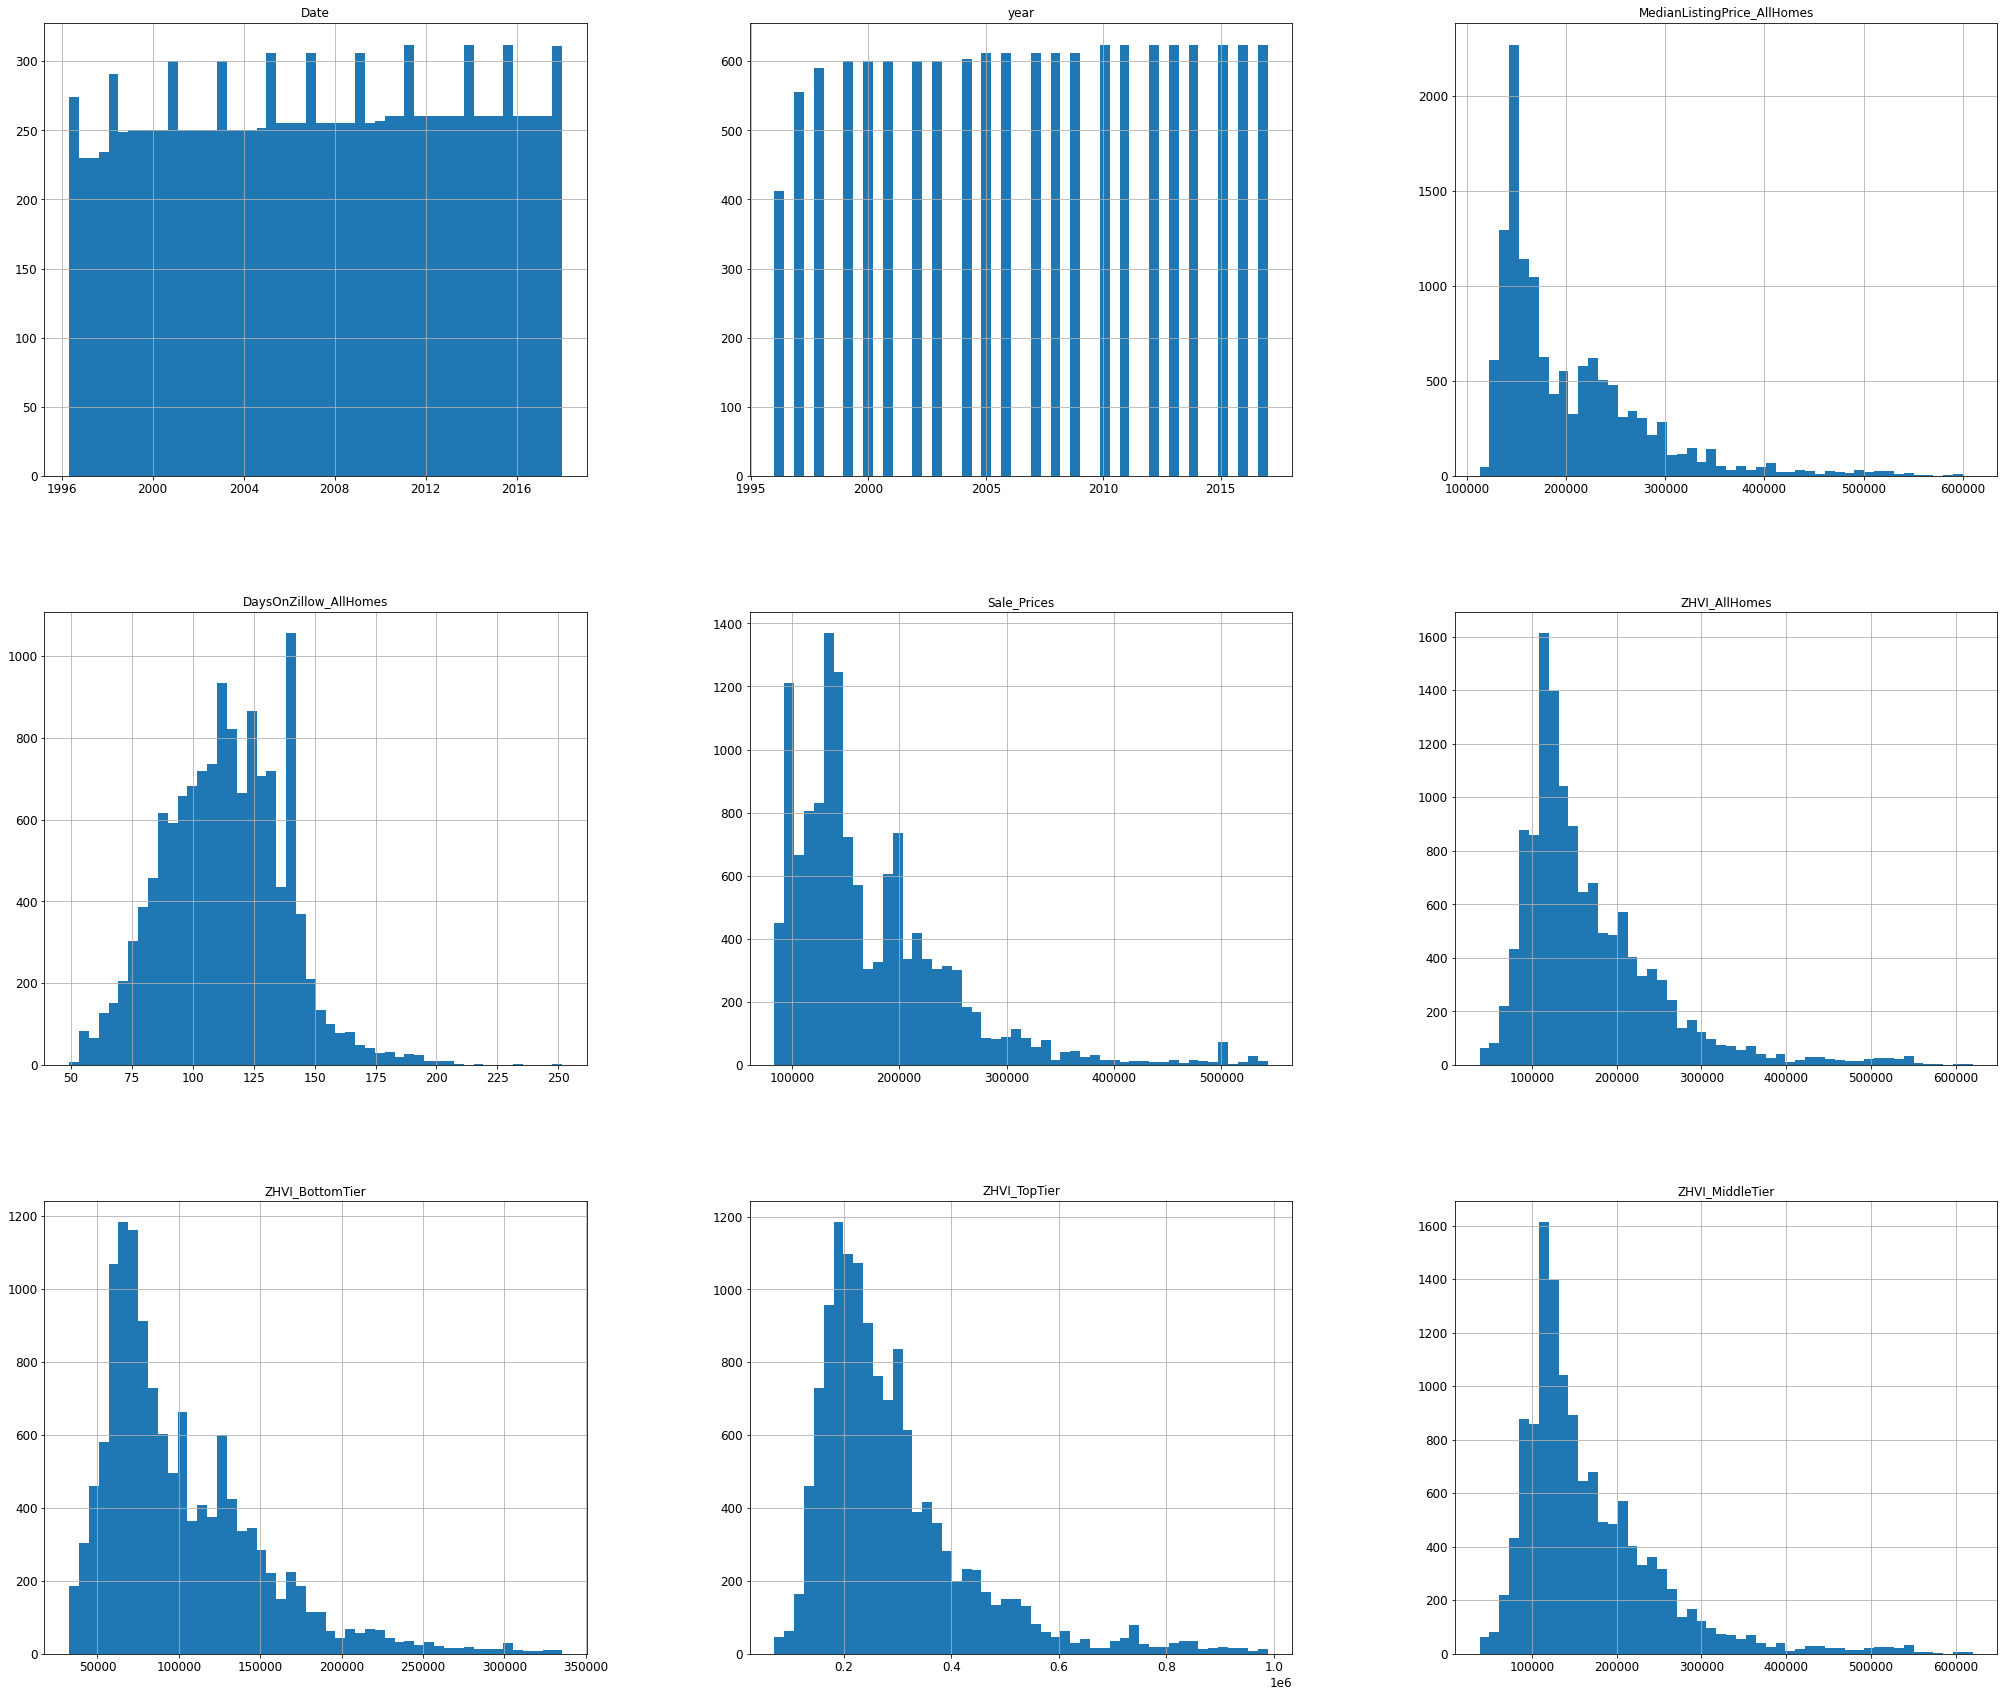

In [26]:
# distribution plot of cleaned Zillow state time series dataset.
df_zillow_states_final.hist(figsize = (35,30), bins = 50)
plt.show()

Text(0.5, 1.0, 'Zillow States Boxplots')

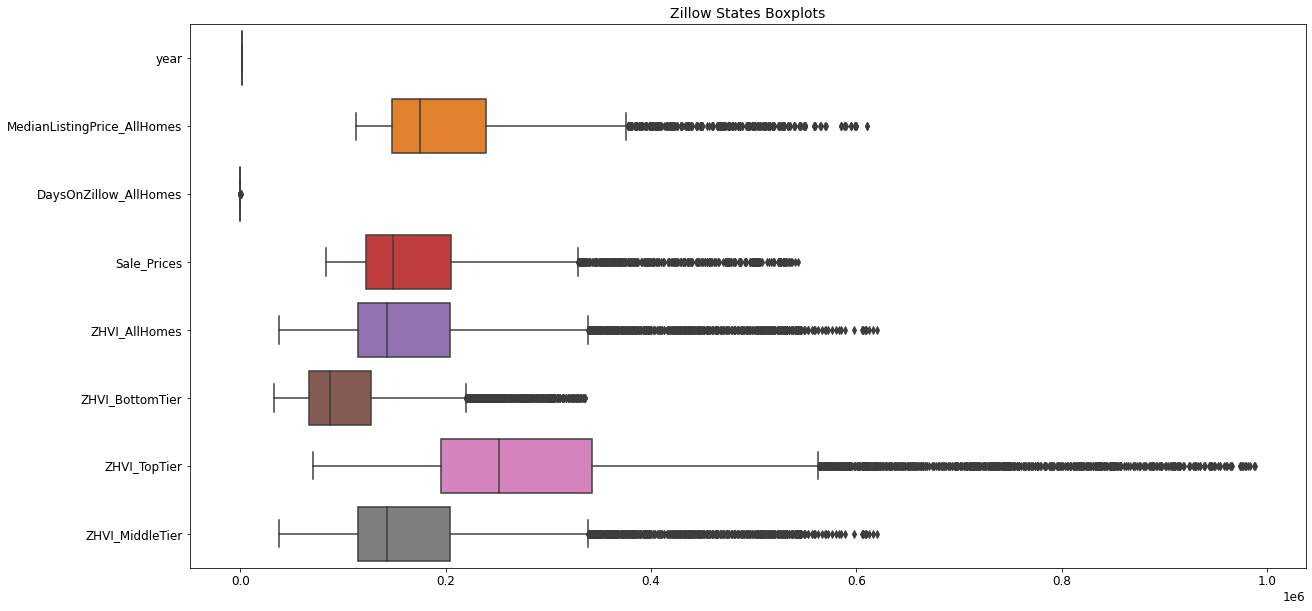

In [27]:
# Plotting Boxplots of the continous features

fig= plt.subplots(figsize=(20,10))
sns.boxplot(data = df_zillow_states_final, orient='h')
plt.title('Zillow States Boxplots',fontsize=14)

Text(0.5, 1.0, 'Mortgage Rates Boxplots')

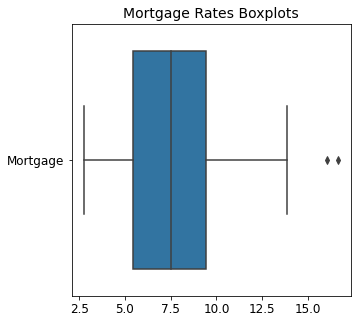

In [28]:
# Plotting Boxplots of the continous features

fig= plt.subplots(figsize=(5,5))
sns.boxplot(data = dfMortgage_rates, orient='h')
plt.title('Mortgage Rates Boxplots',fontsize=14)

In [29]:
# get the required columns
df_unempl = df_unempl[["RegionName","year","Unemployed_rate"]]

#sort the unemployment rate by region and year
df_unempl.sort_values(by=["RegionName","year"],inplace=True)

df_unempl.head()

,RegionName,year,Unemployed_rate
0,Alabama,1976.0,6.7
51,Alabama,1976.0,6.7
102,Alabama,1976.0,6.6
153,Alabama,1976.0,6.5
204,Alabama,1976.0,6.4


In [30]:
#summarize the avg. unemployment rate by region and year
df_unempl_rates = df_unempl.groupby(['RegionName','year'],as_index=False).mean()
df_unempl_rates.head()

,RegionName,year,Unemployed_rate
0,Alabama,1976.0,6.766667
1,Alabama,1977.0,7.316667
2,Alabama,1978.0,6.316667
3,Alabama,1979.0,7.175000
4,Alabama,1980.0,8.883333


In [31]:
# Merge the unemployment rates with Zillow state time series dataset based on year and region name
df_zillow_states_final = pd.merge(df_zillow_states_final,df_unempl_rates,on = ["RegionName",'year'],how="left")

In [32]:
# Merge the mortgage rates with Zillow state time series dataset based on year and region name
df_zillow_states_final = df_zillow_states_final.merge(dfMortgage_rates, on="year")
df_zillow_states_final.head()

,Date,year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Unemployed_rate,Mortgage
0,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0,5.225000,7.806154
1,1996-04-30,1996,Arizona,152080.0,125.425,143260.0,103600.0,67100.0,168700.0,103600.0,5.566667,7.806154
2,1996-04-30,1996,Arkansas,143280.0,139.325,96780.0,64400.0,38400.0,115200.0,64400.0,5.250000,7.806154
3,1996-04-30,1996,California,175215.0,101.100,163800.0,157900.0,95100.0,270600.0,157900.0,7.258333,7.806154
4,1996-04-30,1996,Colorado,152040.0,124.100,129920.0,128100.0,82700.0,209300.0,128100.0,4.241667,7.806154


In [33]:
#visualize mortgage rate trend over years
plt.figure(figsize=(20, 6))
fig = px.line(df_zillow_states_final, x='year', y="Mortgage")
#Set the theme for plotly chart
fig.layout.template = 'plotly_dark'
fig.update_xaxes(rangeslider_visible=True)

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

[Text(0, 0, 'Alabama'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Delaware'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Hawaii'),
 Text(0, 0, 'Idaho'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Maine'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Nebraska'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'NewHampshire'),
 Text(0, 0, 'NewJersey'),
 Text(0, 0, 'NewMexico'),
 Text(0, 0, 'NewYork'),
 Text(0, 0, 'NorthCarolina'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oklahoma'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'RhodeIsland'),
 Text(0, 0, 'SouthCarolina'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Utah

[Text(0, 0.5, 'Zillow Home Value'),
 Text(0.5, 0, 'States'),
 Text(0.5, 1.0, 'Home Value in different states')]

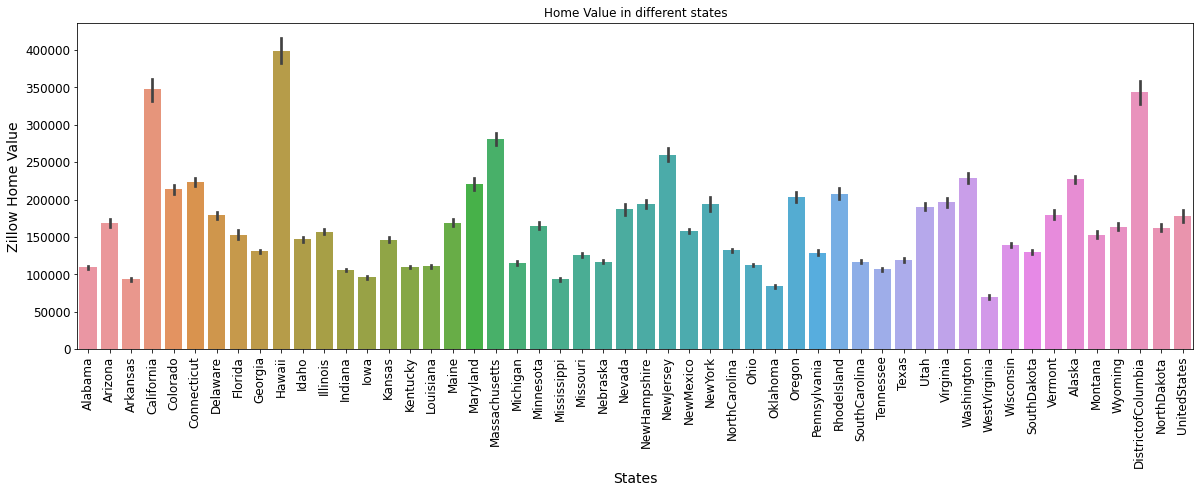

In [34]:
#Visualize Zillow Home Value in different states
plt.figure(figsize=(20, 6))
g=sns.barplot(x="RegionName",y="ZHVI_AllHomes",data=df_zillow_states_final)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='States', ylabel='Zillow Home Value', title='Home Value in different states')

<Figure size 1440x432 with 0 Axes>

Text(0.5, 0, 'Mortgage Rates')

Text(0, 0.5, 'ZHVI')

Text(0.5, 1.0, 'Home sale value Vs Mortage Rates Trend')

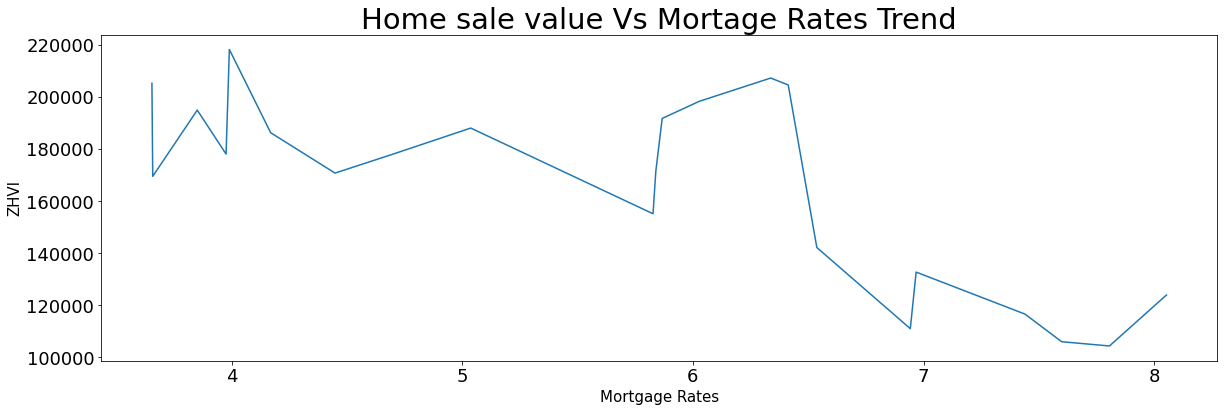

In [35]:
#Visualize Home value and mortagage rate relationship / trend. As mortagage rate decreases, home sale value increases and vice-versa.
plt.figure(figsize=(20, 6))
mean_group = df_zillow_states_final[['Mortgage','ZHVI_AllHomes']].groupby(['Mortgage'])['ZHVI_AllHomes'].mean()
plt.plot(mean_group)
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Mortgage Rates',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
plt.title('Home sale value Vs Mortage Rates Trend',fontsize=29)

<Figure size 1440x432 with 0 Axes>

Text(0.5, 0, 'Unemployment rate')

Text(0, 0.5, 'ZHVI')

Text(0.5, 1.0, 'Not much relationship between unemployment rate and House value')

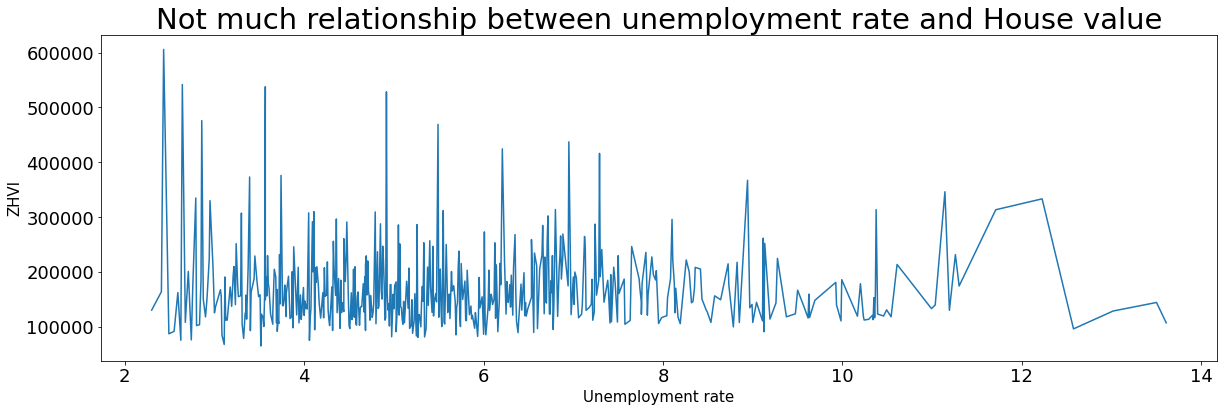

In [36]:
#Visualize Home value and unemployment rate relationship / trend.
plt.figure(figsize=(20, 6))
hv_mean= df_zillow_states_final[['Unemployed_rate','ZHVI_AllHomes']].groupby(['Unemployed_rate'])['ZHVI_AllHomes'].mean()
plt.plot(hv_mean)
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Unemployment rate',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
plt.title('Not much relationship between unemployment rate and House value',fontsize=29)

In [37]:
# concat crime state and city fips code to get county Fips code 
crime_and_pop_data['FIPS'] = crime_and_pop_data['FIPS_ST'].astype(str) + crime_and_pop_data['FIPS_CTY'].astype(str)
crime_and_pop_data.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,FIPS
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,1778,3609,4995,13791,3543,464,318416,29,510,29510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,165,662,1482,1753,189,28,49746,5,35,535
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,5,119,82,184,12,2,7629,17,3,173
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,1,2,5,4,4,0,412,48,261,48261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,17,368,149,494,60,0,27083,22,31,2231


In [38]:
max(crime_and_pop_data['crime_rate_per_100000'])
crime_and_pop_data.loc[crime_and_pop_data['county_name'].str.contains(", WA", case=False)]

1791.995377

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY,FIPS
439,"Pierce County, WA",428.304969,440,1,4,3013,809006,815826,19,21,...,910,2274,9180,20856,3967,169,819743,53,53,5353
611,"Spokane County, WA",366.501320,612,1,4,3018,478407,478407,7,7,...,658,942,6147,19138,2910,98,479398,53,63,5363
641,"Yakima County, WA",359.450138,642,1,4,3025,249564,249564,13,13,...,218,575,3051,5578,1684,54,247044,53,77,5377
719,"King County, WA",337.205770,720,1,4,3003,2012646,1989039,38,39,...,2572,3691,17559,53262,9545,310,2044449,53,33,5333
833,"Garfield County, WA",310.283688,834,1,4,2998,2284,2284,1,1,...,0,6,16,35,2,1,2256,53,23,5323
855,"Cowlitz County, WA",305.321029,856,1,4,2994,103568,103483,6,6,...,66,162,872,2742,237,51,101860,53,15,5315
911,"Grant County, WA",293.867955,912,1,4,2999,92160,86990,10,8,...,48,170,907,2423,287,24,91878,53,25,5325
1019,"Clallam County, WA",272.430579,1020,1,4,2991,72542,72542,4,4,...,24,133,654,1540,112,7,72312,53,9,539
1033,"Kitsap County, WA",268.931519,1034,1,4,3004,257130,257130,5,5,...,111,458,2073,5454,614,42,253968,53,35,5335
1044,"Mason County, WA",267.781874,1045,1,4,3009,61617,61617,2,2,...,22,107,914,1407,256,12,60497,53,45,5345


In [39]:
#Final crime fips code
crime_and_pop_data["FIPS"] = crime_and_pop_data["FIPS"].astype("int64")
crime_and_pop_data= crime_and_pop_data[['FIPS','crime_rate_per_100000']]
crime_and_pop_data.head()

,FIPS,crime_rate_per_100000
0,29510,1791.995377
1,535,1754.914968
2,173,1664.700485
3,48261,1456.310680
4,2231,1447.402430


In [40]:
#Average House price per region
house_prices_per_county = county_time_series.groupby("RegionName").mean()
zillow_Home_avg_price = house_prices_per_county["ZHVI_AllHomes"].to_frame()
zillow_Home_avg_price.reset_index(level=0, inplace=True)
zillow_Home_avg_price.rename(index=str, columns={"RegionName": "FIPS", "ZHVI_AllHomes": "AverageHousePrice"}, inplace=True)
zillow_Home_avg_price["FIPS"] = zillow_Home_avg_price["FIPS"].astype("int64")
zillow_Home_avg_price.dropna(inplace=True)

zillow_Home_avg_price.head()

,FIPS,AverageHousePrice
0,1001,114483.665339
1,1003,164861.685824
4,1009,106357.471264
14,1033,92332.051282
20,1049,98315.492958


In [41]:
# merge zillow crosswalk dataframe based on fips code
zillow_Home_avg_price_per_region = zillow_Home_avg_price.merge(crosswalk, on="FIPS")

zillow_Home_avg_price_per_region.head()

,FIPS,AverageHousePrice,CountyName,StateName
0,1001,114483.665339,Autauga,Alabama
1,1003,164861.685824,Baldwin,Alabama
2,1009,106357.471264,Blount,Alabama
3,1033,92332.051282,Colbert,Alabama
4,1049,98315.492958,De Kalb,Alabama


In [42]:
#public school data set merge based on fips code
zillow_Home_avg_price_per_region = zillow_Home_avg_price_per_region.merge(dfPublicSchool, on="FIPS")
zillow_Home_avg_price_per_region.head()

,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools
0,1001,114483.665339,Autauga,Alabama,15
1,1003,164861.685824,Baldwin,Alabama,47
2,1009,106357.471264,Blount,Alabama,20
3,1033,92332.051282,Colbert,Alabama,27
4,1049,98315.492958,De Kalb,Alabama,20


In [43]:
#public school data set merge
zillow_Home_avg_price_per_region = zillow_Home_avg_price_per_region.merge(crime_and_pop_data, on="FIPS")
zillow_Home_avg_price_per_region.head()

,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools,crime_rate_per_100000
0,1103,106889.361702,Morgan,Alabama,47,254.618615
1,1113,103098.467433,Russell,Alabama,19,449.777629
2,1115,134092.720307,Saint Clair,Alabama,28,203.920842
3,1117,164133.333333,Shelby,Alabama,53,176.804780
4,1123,110576.923077,Tallapoosa,Alabama,13,497.536587


In [44]:
# rename state name to region name
zillow_Home_avg_price_per_region['RegionName'] = zillow_Home_avg_price_per_region['StateName']

In [45]:
# merge the final dataset with state time series dataset based on region name.
df_zillow_states_merged =df_zillow_states_final.merge(zillow_Home_avg_price_per_region,on='RegionName')
df_zillow_states_merged.head()

,Date,year,RegionName,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Unemployed_rate,Mortgage,FIPS,AverageHousePrice,CountyName,StateName,NumberOfSchools,crime_rate_per_100000
0,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0,5.225,7.806154,1103,106889.361702,Morgan,Alabama,47,254.618615
1,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0,5.225,7.806154,1113,103098.467433,Russell,Alabama,19,449.777629
2,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0,5.225,7.806154,1115,134092.720307,Saint Clair,Alabama,28,203.920842
3,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0,5.225,7.806154,1117,164133.333333,Shelby,Alabama,53,176.804780
4,1996-04-30,1996,Alabama,143280.0,139.325,91600.0,79500.0,45600.0,140200.0,79500.0,5.225,7.806154,1123,110576.923077,Tallapoosa,Alabama,13,497.536587


In [46]:
#check for missing value in Final merged dataframe
df_zillow_states_merged.isnull().sum().sum()
df_zillow_states_merged.shape

0

(153619, 18)

<Figure size 1440x432 with 0 Axes>

[Text(0, 0, 'Alabama'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Nebraska'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oklahoma'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Alaska'),
 Text(0, 0, 'Montana')]

[Text(0, 0.5, 'Crime Rate per 100000'),
 Text(0.5, 0, 'States'),
 Text(0.5, 1.0, 'Crime Rate in Different States')]

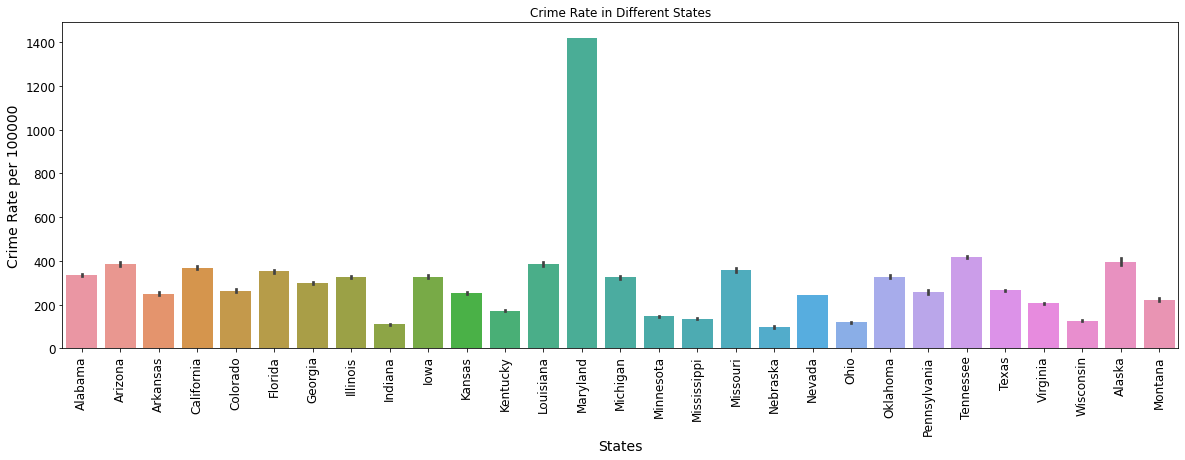

In [47]:
#visualize crime rate in different states.
plt.figure(figsize=(20, 6))
g=sns.barplot(x="RegionName",y="crime_rate_per_100000",data=df_zillow_states_merged)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='States', ylabel='Crime Rate per 100000', title='Crime Rate in Different States')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Crime Rate Per 100000')

Text(0, 0.5, 'ZHVI')

Text(0.5, 1.0, 'House Sale Value Decreases as Crime Rates Increase')

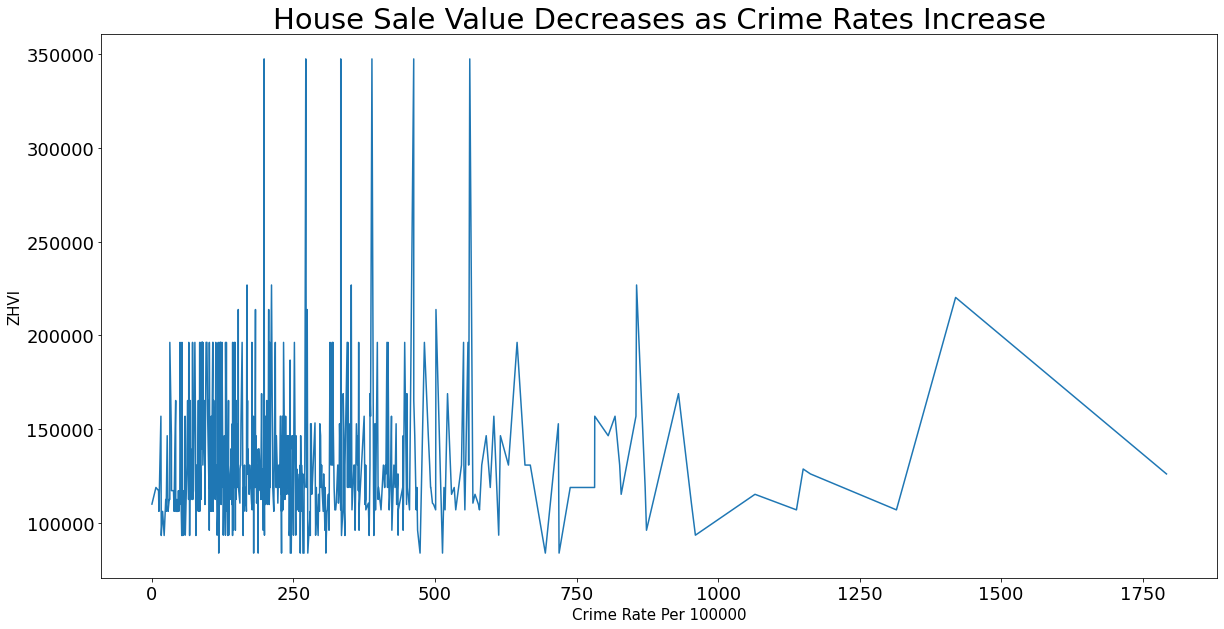

In [48]:
#visualize Home sale value and Crime rate realtionship.
plt.figure(figsize=(20, 10))
crime_avg = df_zillow_states_merged[['crime_rate_per_100000','ZHVI_AllHomes']].groupby(['crime_rate_per_100000'])['ZHVI_AllHomes'].mean()
plt.plot(crime_avg)
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Crime Rate Per 100000',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
# plt.xticks(rotation = 90)
plt.title('House Sale Value Decreases as Crime Rates Increase',fontsize=29)

<Figure size 1440x432 with 0 Axes>

[Text(0, 0, 'Alabama'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Nebraska'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oklahoma'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'Tennessee'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Virginia'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Alaska'),
 Text(0, 0, 'Montana')]

[Text(0, 0.5, 'Number Of Schools '),
 Text(0.5, 0, 'States'),
 Text(0.5, 1.0, 'Number Of School in Different States')]

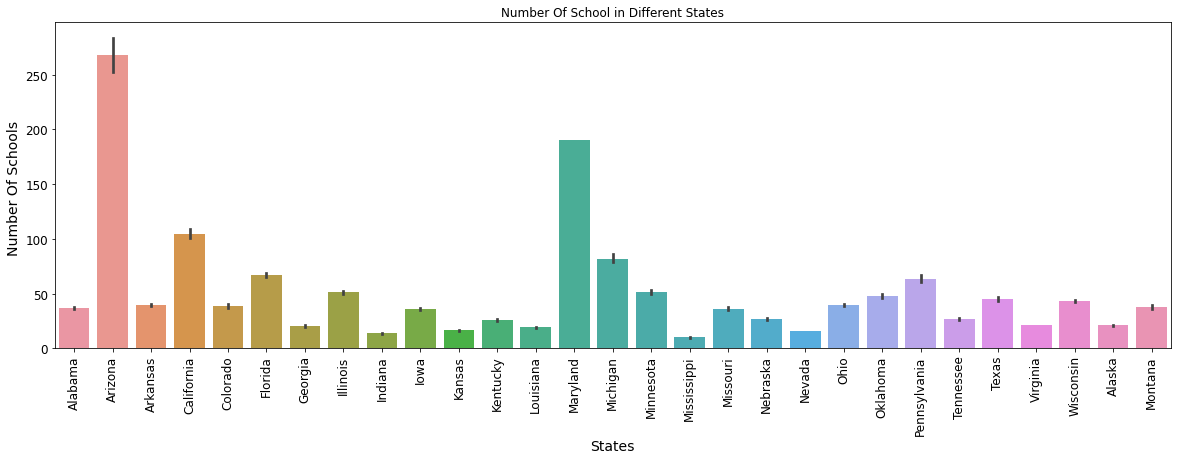

In [49]:
#visualize school dataset in different states.
plt.figure(figsize=(20, 6))
g=sns.barplot(x="RegionName",y="NumberOfSchools",data=df_zillow_states_merged)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='States', ylabel='Number Of Schools ', title='Number Of School in Different States')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Number Of Schools')

Text(0, 0.5, 'ZHVI')

Text(0.5, 1.0, 'House Sale Value Increases as Number of Schools Increase(Demand Increases)')

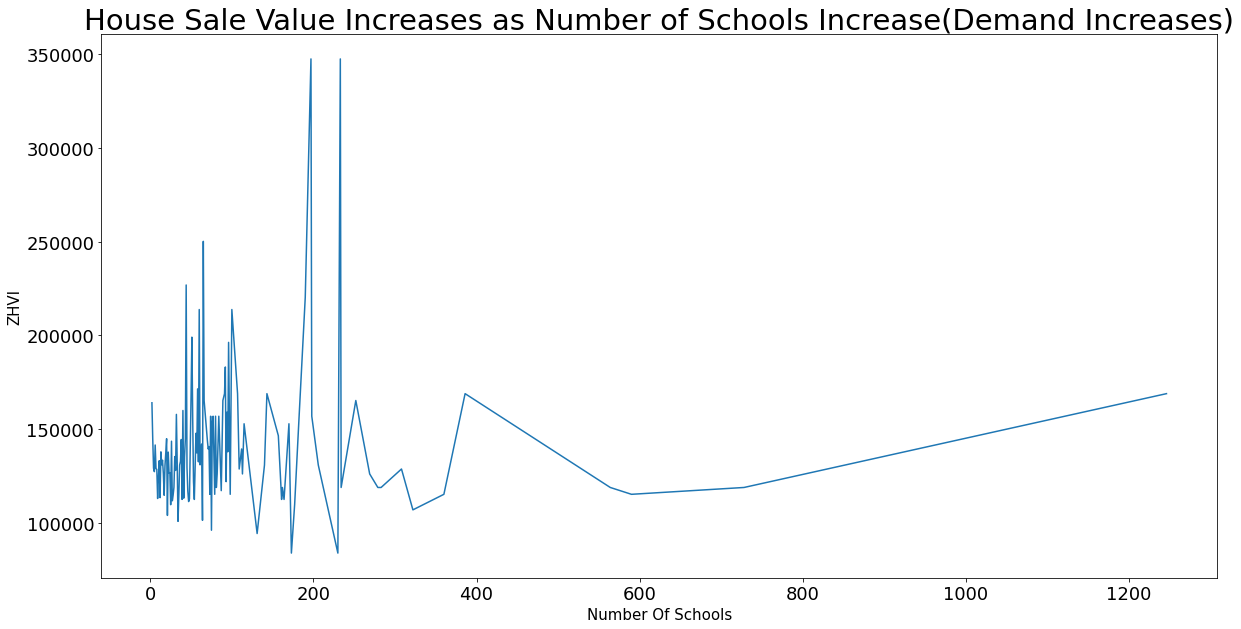

In [50]:
#visualize number of schools and home sale value trend/relationship.
plt.figure(figsize=(20, 10))
Schools_avg = df_zillow_states_merged[['NumberOfSchools','ZHVI_AllHomes']].groupby(['NumberOfSchools'])['ZHVI_AllHomes'].mean()
plt.plot(Schools_avg)
plt.tick_params(axis='both', which = 'major', labelsize = 18)
plt.xlabel('Number Of Schools',fontsize = 15)
plt.ylabel('ZHVI',fontsize = 15)
# plt.xticks(rotation = 90)
plt.title('House Sale Value Increases as Number of Schools Increase(Demand Increases)',fontsize=29)

In [51]:
#final datframe
df_zillow = df_zillow_states_merged[['RegionName', 'ZHVI_AllHomes', 'MedianListingPrice_AllHomes',
                                      'DaysOnZillow_AllHomes', 'Sale_Prices', 'ZHVI_AllHomes', 
                                      'ZHVI_BottomTier', 'ZHVI_TopTier', 'ZHVI_MiddleTier',
                                      'Mortgage', 'Unemployed_rate', 'AverageHousePrice',
                                      'NumberOfSchools', 'crime_rate_per_100000']]

## <font color=RoyalBlue>Feature Importance<font>

(<Figure size 1152x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f05fb639310>)

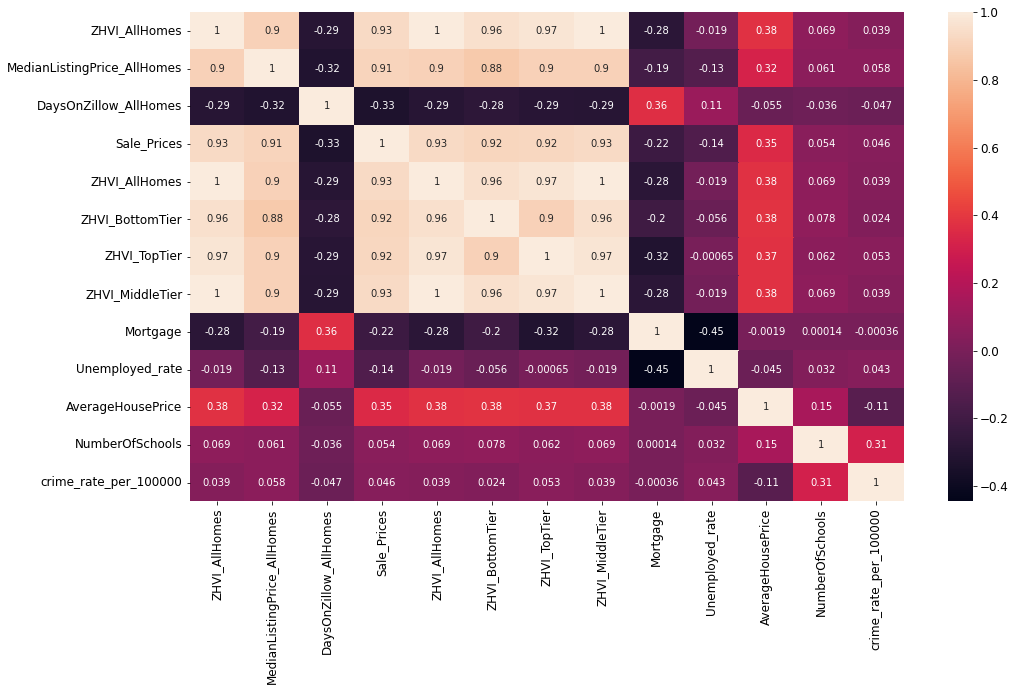

In [52]:
# Plotting correlation heat map
#cont_features = df_unemp_st_timeseries_final.drop(["ZHVI_AllHomes"],axis=1)
corr = df_zillow.corr(method='pearson')

plt.subplots(figsize=(16,9))
cmap = sns.diverging_palette(120,30,as_cmap=True)

sns.heatmap(corr,annot=True)


In [ ]:
#negative and positive correlated features
df_zillow_new = df_zillow.drop(columns=['ZHVI_AllHomes', 'RegionName'])
df_zillow_new.head()
positive_corr = df_zillow_new.corrwith(df_zillow['ZHVI_AllHomes']).sort_values(ascending=False)[:5].index.tolist()
positive_corr
#negative_corr = df_zillow_new.corrwith(df_zillow['ZHVI_AllHomes']).sort_values(ascending=True)[:5].index.tolist()
#negative_corr

,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Mortgage,Unemployed_rate,AverageHousePrice,NumberOfSchools,crime_rate_per_100000
0,143280.0,139.325,91600.0,45600.0,140200.0,79500.0,7.806154,5.225,106889.361702,47,254.618615
1,143280.0,139.325,91600.0,45600.0,140200.0,79500.0,7.806154,5.225,103098.467433,19,449.777629
2,143280.0,139.325,91600.0,45600.0,140200.0,79500.0,7.806154,5.225,134092.720307,28,203.920842
3,143280.0,139.325,91600.0,45600.0,140200.0,79500.0,7.806154,5.225,164133.333333,53,176.804780
4,143280.0,139.325,91600.0,45600.0,140200.0,79500.0,7.806154,5.225,110576.923077,13,497.536587


['AverageHousePrice',
 'DaysOnZillow_AllHomes',
 'MedianListingPrice_AllHomes',
 'Mortgage',
 'NumberOfSchools']

<Figure size 720x576 with 0 Axes>

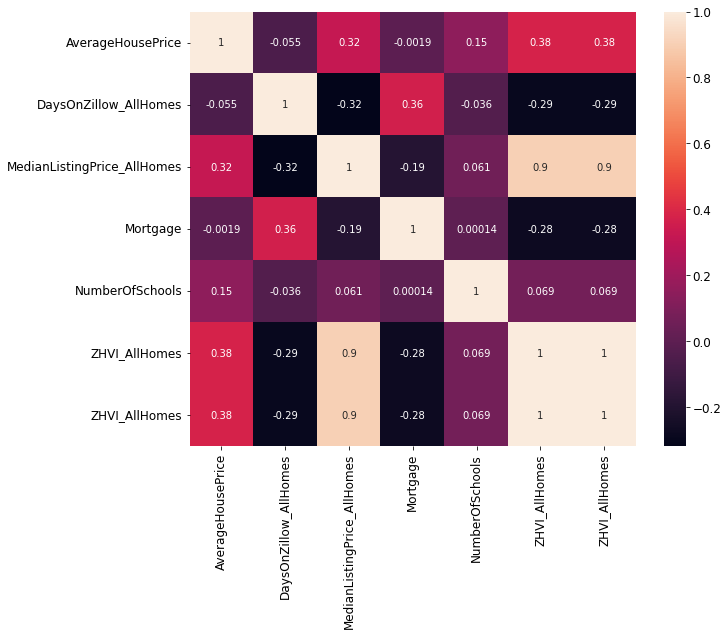

In [ ]:
relation = positive_corr + ['ZHVI_AllHomes']
plt.figure(figsize=(10,8))
sns.heatmap(df_zillow[relation].corr(),annot=True)

In [ ]:
#Run random forest regressor(not classifier) Feature Importance
rf=RandomForestRegressor(n_estimators=1000, random_state=777, n_jobs=-1)
rf.fit(df_zillow_new, df_zillow['ZHVI_AllHomes'])
rf.feature_importances_

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=777)

array([3.01134331e-06, 6.56344598e-07, 4.39283555e-04, 1.60909622e-06,
       5.73979202e-07, 9.99554469e-01, 1.89144213e-07, 1.98474711e-07,
       3.63186956e-09, 2.26170680e-09, 3.34759836e-09])

In [ ]:
rf.feature_importances_

array([3.01134331e-06, 6.56344598e-07, 4.39283555e-04, 1.60909622e-06,
       5.73979202e-07, 9.99554469e-01, 1.89144213e-07, 1.98474711e-07,
       3.63186956e-09, 2.26170680e-09, 3.34759836e-09])

In [ ]:
def get_feature_importance_df(feature_importances,
                              column_names, 
                              top_n=10):
     
    imp_dict = dict(zip(column_names, feature_importances))
    
    # get name features sorted
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    
    # get values
    top_importances = [imp_dict[feature] for feature in top_features]
    
    # create dataframe with feature_importance
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

In [ ]:
feature_importance = get_feature_importance_df(rf.feature_importances_, df_zillow_new.columns, 12)
print(feature_importance)

                        feature    importance
0               ZHVI_MiddleTier  9.995545e-01
1                   Sale_Prices  4.392836e-04
2   MedianListingPrice_AllHomes  3.011343e-06
3               ZHVI_BottomTier  1.609096e-06
4         DaysOnZillow_AllHomes  6.563446e-07
5                  ZHVI_TopTier  5.739792e-07
6               Unemployed_rate  1.984747e-07
7                      Mortgage  1.891442e-07
8             AverageHousePrice  3.631870e-09
9         crime_rate_per_100000  3.347598e-09
10              NumberOfSchools  2.261707e-09


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

[Text(0, 0.5, 'Importance'),
 Text(0.5, 0, 'Variable Names'),
 Text(0.5, 1.0, 'Feature Importances based on target variable zillow home value')]

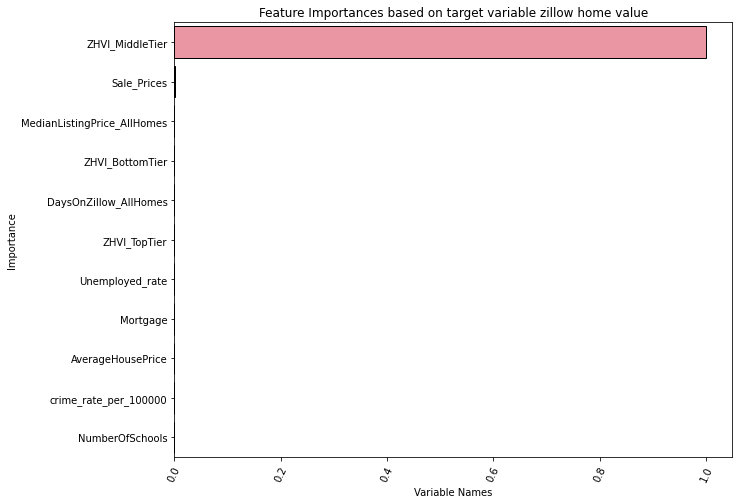

In [ ]:
#plot feature importance
fig,ax = plt.subplots()
plt.xticks(rotation=65)

fig.set_size_inches(10,8)
sns.barplot(data=feature_importance, 
            x="importance", 
            y="feature", 
            edgecolor='k',
            ax=ax,
            orient = 'h')
ax.set(xlabel="Variable Names",
       ylabel='Importance',
       title="Feature Importances based on target variable zillow home value")

Based on the above plot, we dont see much importance on feature apart from ZHVI_middletier i.e. inventory share based on middle tier. So, lets use the entire dataset for train and prediction.

## <font color=RoyalBlue>Train & Test Split<font>

In [53]:
X, y = df_zillow_states_merged.loc[:, df_zillow_states_merged.columns != 'ZHVI_AllHomes'], df_zillow_states_merged.loc[:, 'ZHVI_AllHomes'] 

In [54]:
#Train and test split
X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
X_trn.shape, X_test.shape, y_trn.shape, y_test.shape

((122895, 17), (30724, 17), (122895,), (30724,))

In [55]:
#train split to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn, test_size = 0.2, random_state = 42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((98316, 17), (24579, 17), (98316,), (24579,))

In [56]:
# Dropping categorical colums for the purposes of input into XGBoostRegressor

X_train_d = X_train["Date"]
X_train =  X_train.drop(["Date","RegionName","CountyName","StateName"], axis=1)

In [57]:
X_train.head()

,year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Unemployed_rate,Mortgage,FIPS,AverageHousePrice,NumberOfSchools,crime_rate_per_100000
108332,2004,162099.0,86.90,129100.0,54200.0,197300.0,102000.0,5.358333,5.839231,47189,173240.613027,27,323.096478
96559,2014,124900.0,113.25,118600.0,60100.0,210600.0,113100.0,5.800000,4.168868,39149,109625.287356,21,148.398113
144811,2011,209900.0,117.50,216900.0,118800.0,423500.0,209300.0,6.591667,4.447885,51107,372560.153257,92,84.363087
150053,2005,174500.0,96.70,159100.0,91800.0,250200.0,151400.0,4.716667,5.866731,55113,214034.482759,13,187.730879
26550,2015,179990.0,111.75,145100.0,68800.0,267400.0,132700.0,5.983333,3.850577,13127,179768.322981,18,559.454287


In [58]:
# Dropping categorical colums for the purposes of input into XGBoostRegressor
X_valid = X_valid.drop(["Date","RegionName","CountyName","StateName"], axis=1)

In [59]:
# Dropping categorical colums for the purposes of input into XGBoostRegressor
X_test_d=X_test["Date"]
X_test = X_test.drop(["Date","RegionName","CountyName","StateName"], axis=1)

In [60]:
X_test.head()

,year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Unemployed_rate,Mortgage,FIPS,AverageHousePrice,NumberOfSchools,crime_rate_per_100000
110359,2009,165380.000000,154.975000,111600.000000,63400.000000,228500.000000,119400.000000,10.458333,5.036538,47121,113320.958084,4,454.974676
73787,2007,266680.000000,122.325000,214060.000000,126800.000000,335600.000000,206300.000000,4.550000,6.337308,27157,144029.885057,13,41.971739
68703,2006,182500.000000,92.900000,150220.000000,80200.000000,241800.000000,138100.000000,7.008333,6.413269,26111,118480.459770,26,121.545776
49911,2000,223378.492228,110.117363,194551.777666,102669.974018,293973.810284,169753.408908,3.608333,8.053462,20173,103887.356322,157,615.533769
75694,2016,225000.000000,79.500000,211900.000000,118800.000000,333300.000000,197300.000000,3.866667,3.654038,27169,123520.689655,19,81.980012


***use X_train, y_train to fit the model, X_valid, y_valid as validaion set and X_test,y_test for final prediction set***

## <font color=RoyalBlue>Modeling<font>

##<font color=RoyalBlue>1. Ridge Regression</font>

In [64]:
from sklearn.linear_model import Ridge
ridge_reg1 = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg1.fit(X_train, y_train)
y_pred = ridge_reg1.predict(X_test)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [65]:
score = ridge_reg1.score(X_test, y_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("R2:{0:.2f}, MSE:{1:.2f}, RMSE:{2:.2f}"
       .format(score, mse, np.sqrt(mse)))

R2:1.00, MSE:0.00, RMSE:0.00


In [70]:
ridge_reg2 = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg2.fit(X_train, y_train)
y_pred = ridge_reg2.predict(X_test)

Ridge(alpha=1, random_state=42, solver='sag')

In [68]:
rmse = np.mean((ridge_reg2.predict(X_train)-y_train)**2)
rmse_tst = np.mean((ridge_reg2.predict(X_test)-y_test)**2)
rmse_vld = np.mean((ridge_reg2.predict(X_valid)-y_valid)**2)

print("rmse: {:}".format(rmse))
print("rmse_tst: {:}".format(rmse_tst))
print("rmse_vld: {:}".format(rmse_vld))

rmse: 117.84930812202495
rmse_tst: 117.1864679757155
rmse_vld: 115.60268916284134


In [72]:
score = ridge_reg2.score(X_test, y_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print("R2:{0:.2f}, MSE:{1:.2f}, RMSE:{2:.2f}"
       .format(score, mse, np.sqrt(mse)))

R2:1.00, MSE:117.19, RMSE:10.83


<Figure size 1800x1440 with 0 Axes>

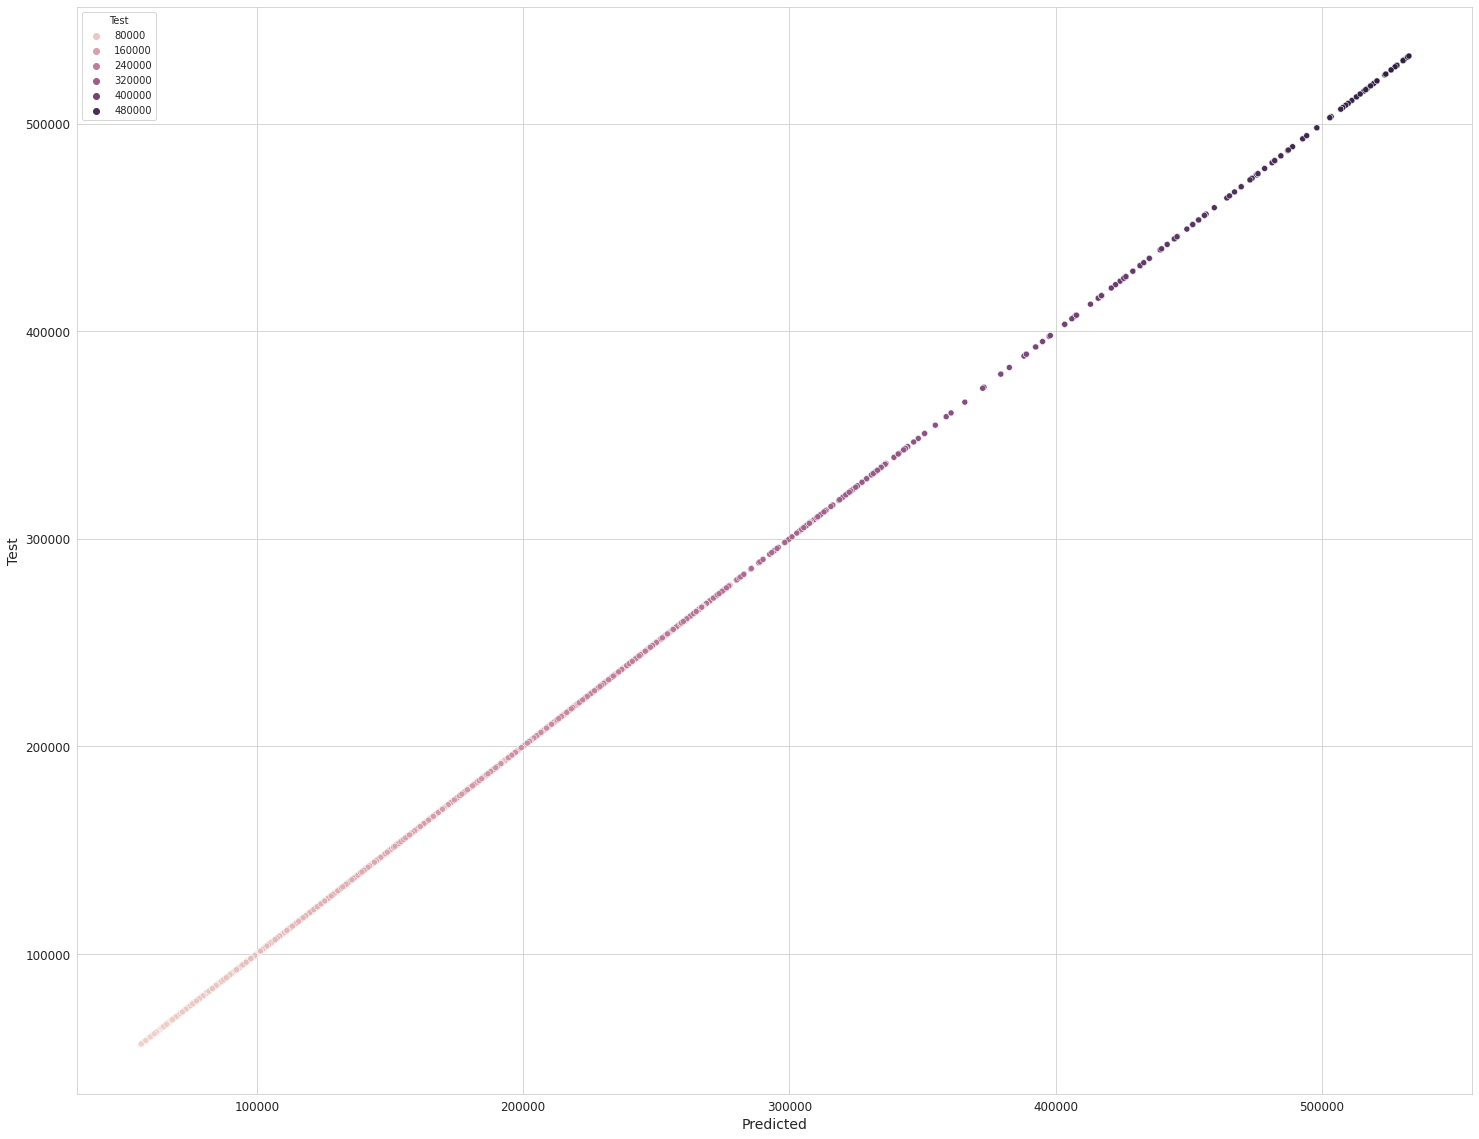

In [73]:
# Plotting of Predicted scores and Test scores
plt.figure(figsize=(25, 20))
df = pd.DataFrame(list(zip(y_pred, y_test)), 
               columns =['Predicted', 'Test']) 
sns.set_style("whitegrid") 
  
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test') 

##<font color=RoyalBlue>2. RandomForestRegressor Model</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#HalvingGridSearchCV to get best estimator
rfr= RandomForestRegressor()
param_grid = { 
    'n_estimators': [100,150,200,250,300,400],
    'min_samples_split':[2],
    'min_samples_leaf':[5],
    'max_features': ['auto'],
    'max_depth': [None],
    'bootstrap': [True]
}
gs_rfc = HalvingGridSearchCV(rfr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
gs_rfc.fit(X_train, y_train)


HalvingGridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                    param_grid={'bootstrap': [True], 'max_depth': [None],
                                'max_features': ['auto'],
                                'min_samples_leaf': [5],
                                'min_samples_split': [2],
                                'n_estimators': [100, 150, 200, 250, 300, 400]},
                    scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters: {}".format(gs_rfc.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_rfc.best_score_))
print("Best estimator:\n{}".format(gs_rfc.best_estimator_))

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 250}
Best cross-validation score: -2980.27
Best estimator:
RandomForestRegressor(min_samples_leaf=5, n_estimators=250)


In [ ]:
    #calculate the RMSE train test and validation for model evaluation
    tmp=gs_rfc.predict(X_valid)
    rmse = np.mean((gs_rfc.predict(X_train)-y_train)**2)
    rmse_tst = np.mean((gs_rfc.predict(X_test)-y_test)**2)
    rmse_vld = np.mean((gs_rfc.predict(X_valid)-y_valid)**2)
    
    print("rmse: {:}".format(rmse))
    print("rmse_tst: {:}".format(rmse_tst))
    print("rmse_vld: {:}".format(rmse_vld))

    print("Best parameters: {}".format(gs_rfc.best_params_))
    print("Best cross-validation score: {:.2f}".format(gs_rfc.best_score_))
    print("Best estimator:\n{}".format(gs_rfc.best_estimator_))

rmse: 655.1830966320051
rmse_tst: 1188.6582637803003
rmse_vld: 1183.4746950696278
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 400}
Best cross-validation score: -2843.48
Best estimator:
RandomForestRegressor(min_samples_leaf=5, n_estimators=400)


In [ ]:
#fit the model with best estimator found above
rf_model=RandomForestRegressor(min_samples_leaf=5, n_estimators=250, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

RandomForestRegressor(min_samples_leaf=5, n_estimators=400, random_state=42)

<Figure size 1800x1440 with 0 Axes>

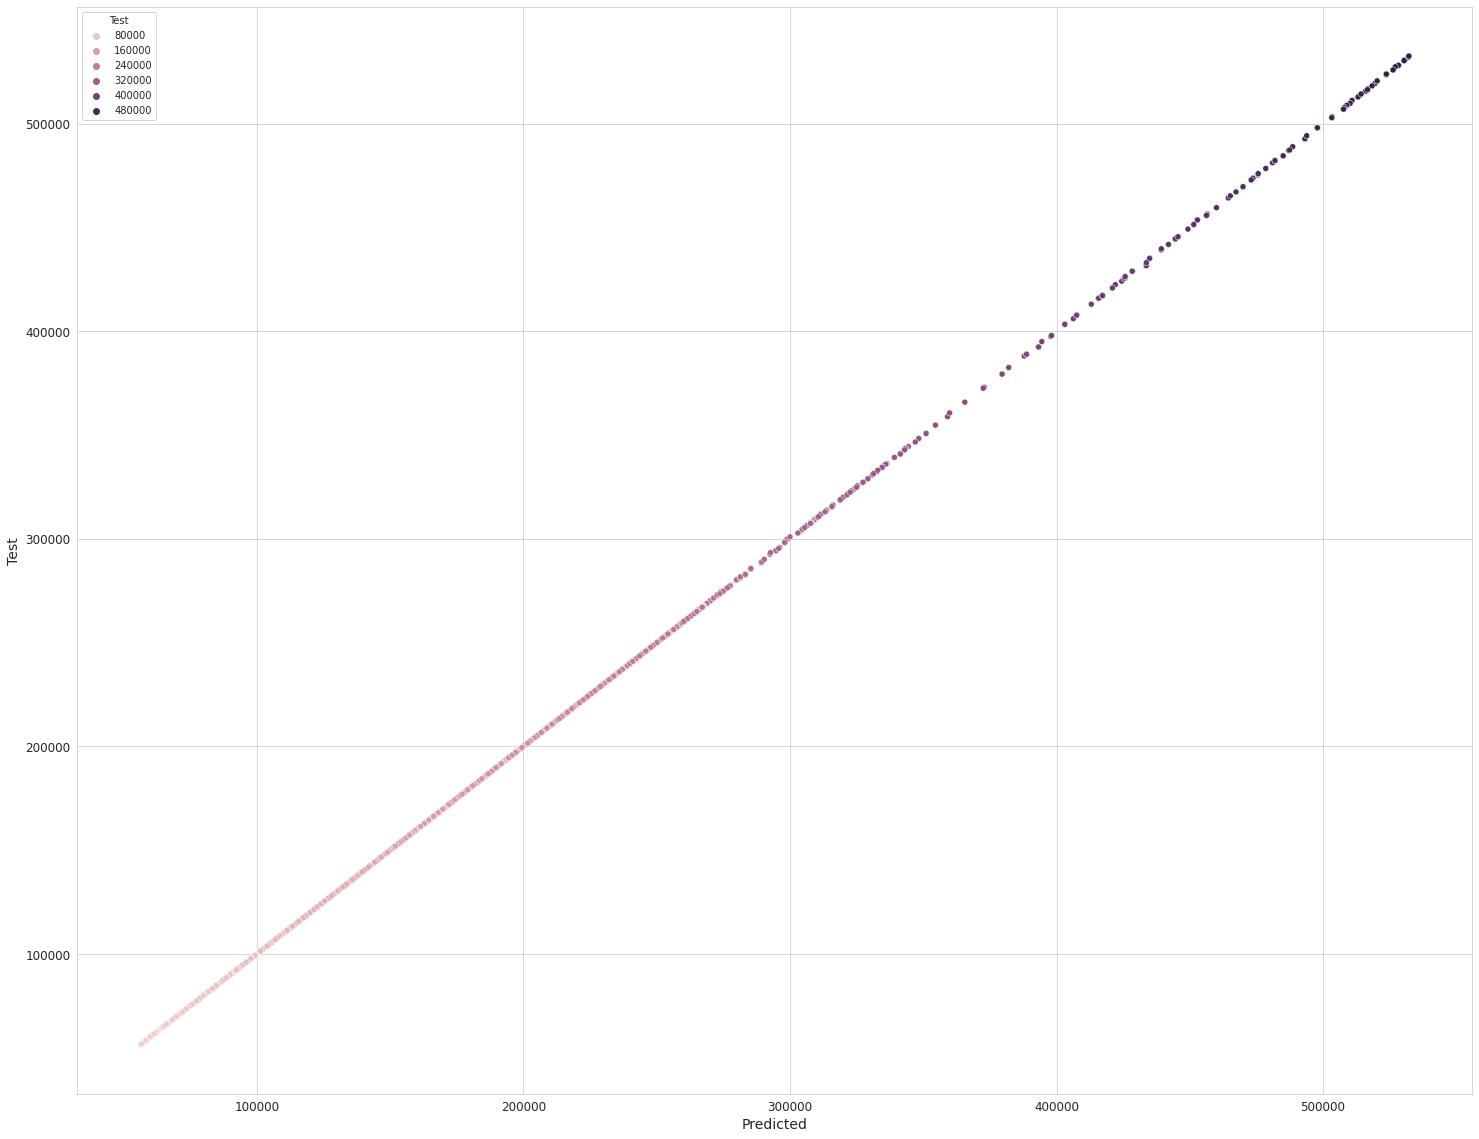

In [ ]:
# Plotting of Predicted scores and Test scores
plt.figure(figsize=(25, 20))
df = pd.DataFrame(list(zip(y_pred_rf, y_test)), 
               columns =['Predicted', 'Test']) 
sns.set_style("whitegrid") 
  
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test') 

## <font color=RoyalBlue>3. XGBoostRegressor Model</font>

For Tree base learners, the most common parameters are:
max_depth: The maximum depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit.
The value must be an integer greater than 0. Default is 6.

learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective. A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate. But it optimizes the chances to reach the best optimum.
The value must be between 0 and 1. Default is 0.3.

n_estimators: The number of trees in our ensemble. Equivalent to the number of boosting rounds.
The value must be an integer greater than 0. Default is 100.
NB: In the standard library, this is referred as num_boost_round.

colsample_bytree: Represents the fraction of columns to be randomly sampled for each tree. It might improve overfitting.
The value must be between 0 and 1. Default is 1.

subsample: Represents the fraction of observations to be sampled for each tree. A lower values prevent overfitting but might lead to under-fitting.
The value must be between 0 and 1. Default is 1.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# Grid SearchCV to fit the model based on hyperparameters
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=3, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=1
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
# configure parameters for tuning for the XGBoostRegression
model = XGBRegressor(seed=20)

param_grid = { 'max_depth': [6,9],
           'learning_rate': [0.01, 0.05],
           'n_estimators': [500, 1000],
           'colsample_bytree': [0.3, 0.7]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[09:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Results of Performance tuning on the XGBoostRegressor model
print("Lowest RMSE: ", np.sqrt(-model.best_score_))
print("Best Paramenters: ", model.best_params_)
print("XGBoostRegressor:", model.best_estimator_)


Lowest RMSE:  76.78459391370319
Best Paramenters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 1000}
XGBoostRegressor: XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=9,
             n_estimators=1000, seed=20)


In [ ]:
# For the purposes of saving time on reusing the notebook, we will train the model again using the best parameters

model_xgb = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=9,
             n_estimators=1000, seed=20)

# fit the model
model = model_xgb.fit(X_train, y_train)

# predict on the test data
pred = model.predict(X_test)


[05:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred

array([119416.16, 206302.28, 138138.23, ..., 139525.94, 106892.7 ,
       103795.68], dtype=float32)

In [ ]:
# predict on train and test dataset
pred

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
preds_valid = model.predict(X_valid)

array([119416.16, 206302.28, 138138.23, ..., 139525.94, 106892.7 ,
       103795.68], dtype=float32)

In [ ]:
print('XGBoosting:\n> RMSE on training data = {:.4f}\n> RMSE on test data = {:.4f}\n> RMSE on valid data = {:.4f}'.format(
    np.sqrt(metrics.mean_squared_error(y_true=y_train, y_pred=preds_train)),
    np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=preds_test)),
    np.sqrt(metrics.mean_squared_error(y_true=y_valid, y_pred=preds_valid))
))

XGBoosting:
> RMSE on training data = 24.5327
> RMSE on test data = 68.1135
> RMSE on valid data = 62.1524


<Figure size 1800x1440 with 0 Axes>

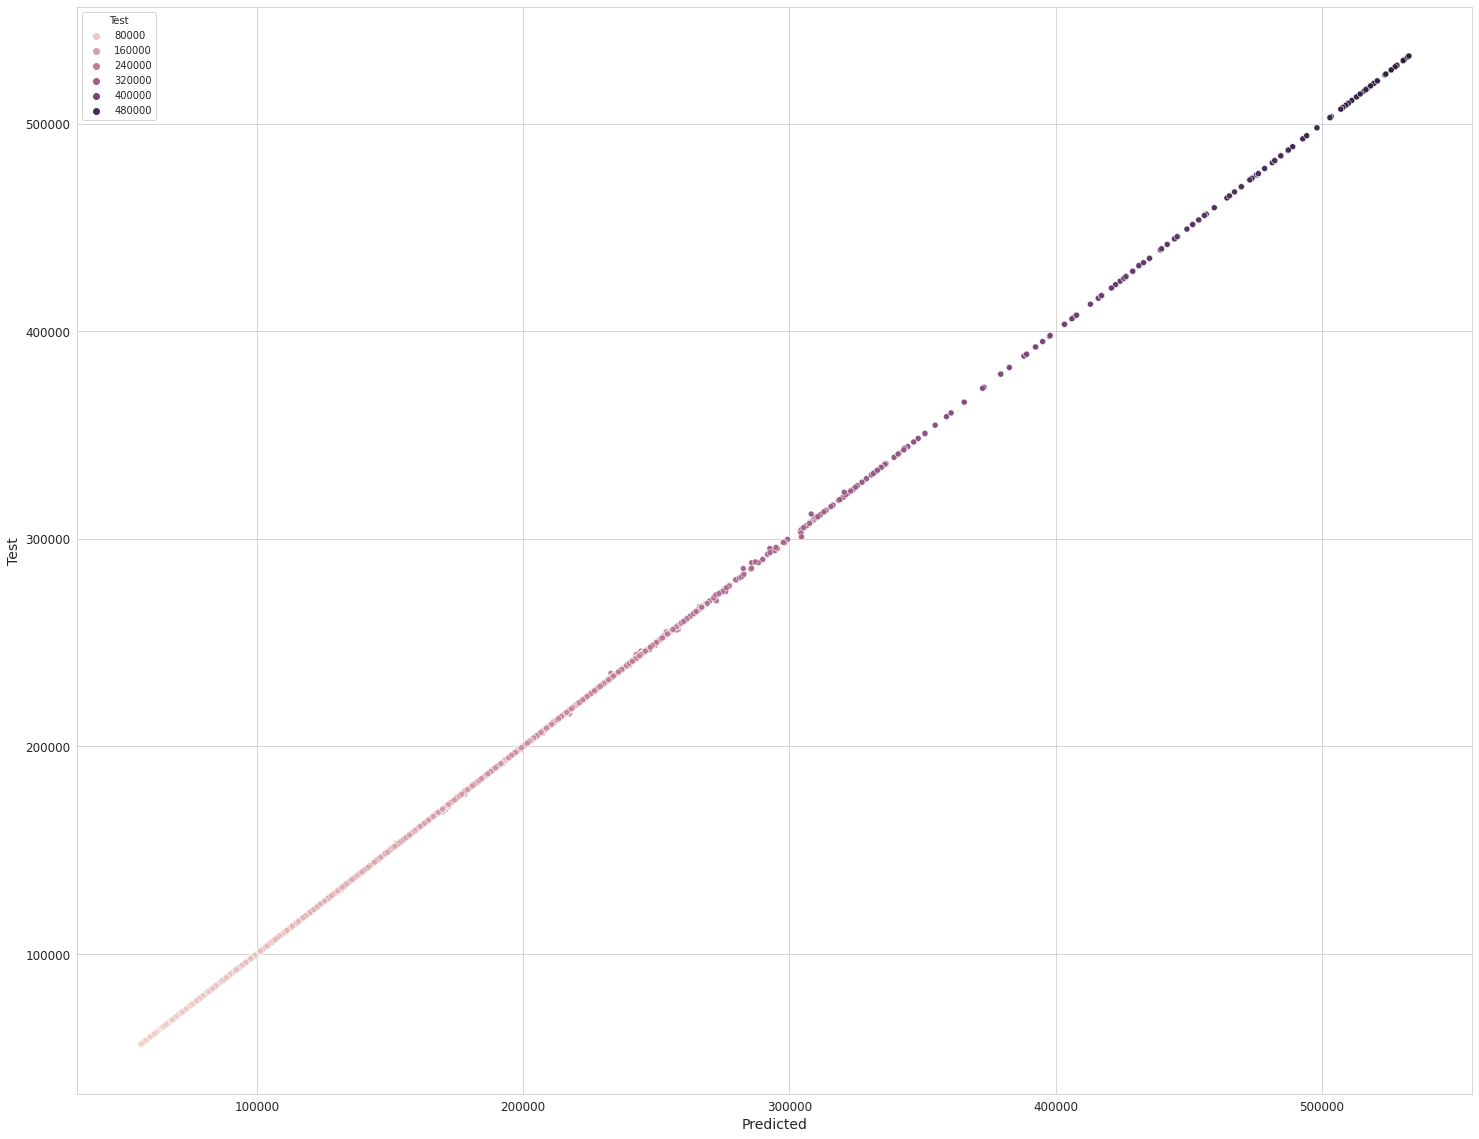

In [ ]:
# Plotting of Predicted scores and Test scores
plt.figure(figsize=(25, 20))
df = pd.DataFrame(list(zip(preds_test, y_test)), 
               columns =['Predicted', 'Test']) 
sns.set_style("whitegrid") 
  
sns.scatterplot(x = 'Predicted', y = 'Test', data = df,hue='Test') 

In [ ]:
# Combine predictor scores 
df_pred = pd.DataFrame(y_test,columns=["ZHVI_AllHomes"])
df_pred['ZHVI_AllHomes'] =  preds_test[:]
df_pred.info()
df_pred.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30724 entries, 110359 to 120412
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ZHVI_AllHomes  30724 non-null  float32
dtypes: float32(1)
memory usage: 360.0 KB


,ZHVI_AllHomes
110359,119416.156250
73787,206302.281250
68703,138138.234375
49911,169752.156250
75694,197275.734375


In [ ]:
# Combine the date feature that we dropped earlier
X_test = X_test.join(X_test_d)

# Combine the ZHVI_AllHomes predicted scores
X_test = X_test.join(df_pred)

In [ ]:
#frames = [X_test2, df_pred]
#df_final = pd.concat(X_test2,df_pred)
df_final = X_test

#df_final.set_index(['Date'],inplace=True)

df_final.head()

,year,MedianListingPrice_AllHomes,DaysOnZillow_AllHomes,Sale_Prices,ZHVI_BottomTier,ZHVI_TopTier,ZHVI_MiddleTier,Unemployed_rate,Mortgage,FIPS,AverageHousePrice,NumberOfSchools,crime_rate_per_100000,Date,ZHVI_AllHomes
110359,2009,165380.000000,154.975000,111600.000000,63400.000000,228500.000000,119400.000000,10.458333,5.036538,47121,113320.958084,4,454.974676,2009-06-30,119416.156250
73787,2007,266680.000000,122.325000,214060.000000,126800.000000,335600.000000,206300.000000,4.550000,6.337308,27157,144029.885057,13,41.971739,2007-05-31,206302.281250
68703,2006,182500.000000,92.900000,150220.000000,80200.000000,241800.000000,138100.000000,7.008333,6.413269,26111,118480.459770,26,121.545776,2006-11-30,138138.234375
49911,2000,223378.492228,110.117363,194551.777666,102669.974018,293973.810284,169753.408908,3.608333,8.053462,20173,103887.356322,157,615.533769,2000-05-31,169752.156250
75694,2016,225000.000000,79.500000,211900.000000,118800.000000,333300.000000,197300.000000,3.866667,3.654038,27169,123520.689655,19,81.980012,2016-09-30,197275.734375


In [ ]:
df_final1 = df_final.set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all').ZHVI_AllHomes
df_final1.head()


Date
1996-04-30    91704.421875
1996-05-31    90517.570312
1996-06-30    91929.734375
1996-07-31    95483.039062
1996-08-31    93346.953125
Name: ZHVI_AllHomes, dtype: float32

Text(0.5, 1.0, 'Zillow Home Value Index in different year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Zillow Home Value Index')

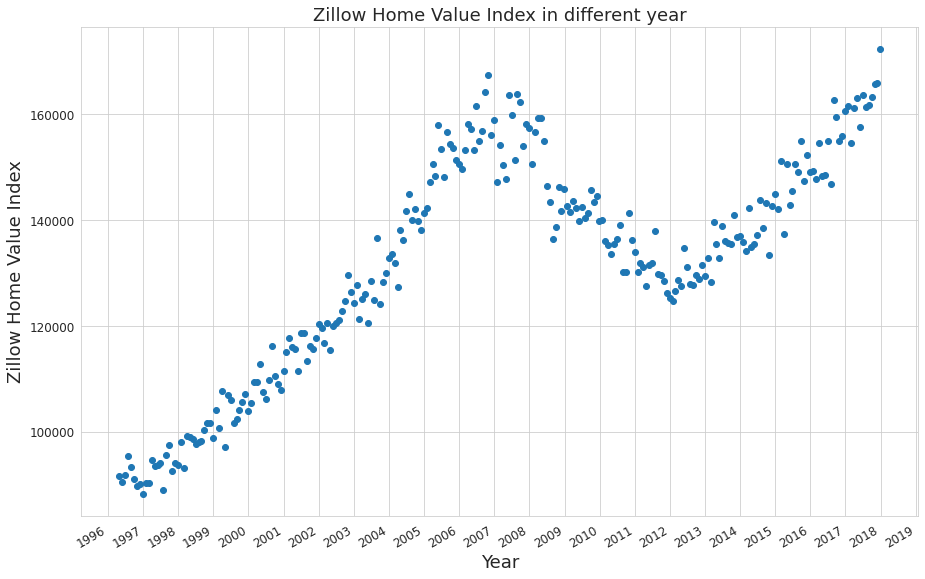

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df_final1.index, df_final1)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Zillow Home Value Index in different year', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Zillow Home Value Index', fontsize=18)
fig.autofmt_xdate()
plt.show()

## <font color=RoyalBlue>4. LSTM Model<font>

In [ ]:
# frame a sequence as a supervised learning problem
# this methods will create a column and column value will be 1 shift from the data. 
# it will make our data to supervised so that we can feed into network
def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], 2)
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], 2)
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = keras.Sequential()
	model.add(keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(keras.layers.Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size, verbose=0)
	return yhat[0,0]

In [ ]:
df_zillow_states_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153619 entries, 0 to 153618
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date                         153619 non-null  datetime64[ns]
 1   year                         153619 non-null  int64         
 2   RegionName                   153619 non-null  object        
 3   MedianListingPrice_AllHomes  153619 non-null  float64       
 4   DaysOnZillow_AllHomes        153619 non-null  float64       
 5   Sale_Prices                  153619 non-null  float64       
 6   ZHVI_AllHomes                153619 non-null  float64       
 7   ZHVI_BottomTier              153619 non-null  float64       
 8   ZHVI_TopTier                 153619 non-null  float64       
 9   ZHVI_MiddleTier              153619 non-null  float64       
 10  Unemployed_rate              153619 non-null  float64       
 11  Mortgage                  

In [ ]:

df_ZHVI_AllHomes= df_zillow_states_merged.set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all').ZHVI_AllHomes
df_ZHVI_AllHomes.head()

Date
1996-04-30    90529.347407
1996-05-31    91168.901438
1996-06-30    91539.879140
1996-07-31    91935.110701
1996-08-31    91349.656155
Name: ZHVI_AllHomes, dtype: float64

Text(0.5, 1.0, 'Zillow Home Value in different year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Zillow Home Value')

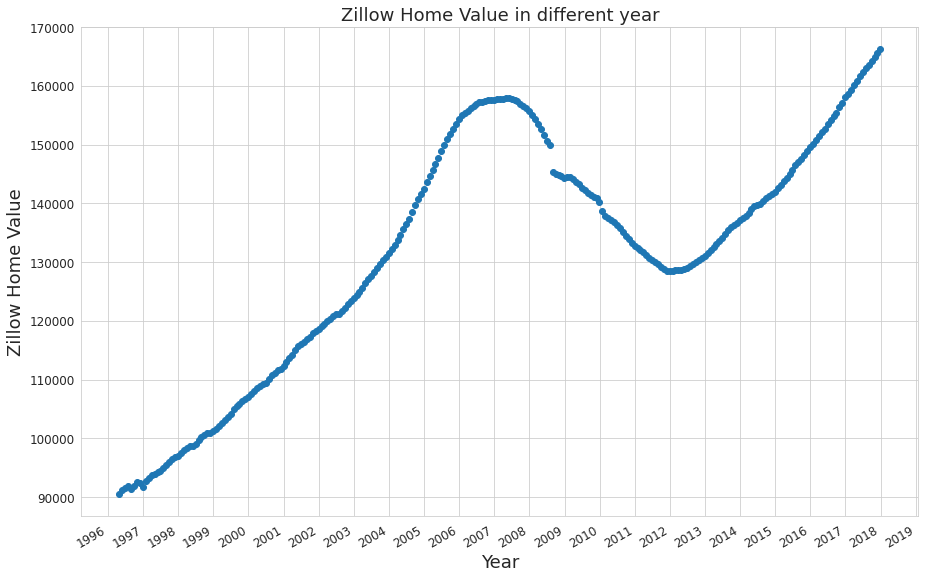

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df_ZHVI_AllHomes.index, df_ZHVI_AllHomes)
# change x axis year location interval to 1 year. So that it displays data in interval of 1 year
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Add the title to the graph
plt.title('Zillow Home Value in different year', fontsize=18)
# add xlabel
plt.xlabel('Year', fontsize=18)
# add ylabel
plt.ylabel('Zillow Home Value', fontsize=18)
# beautify the x axis date presentation
fig.autofmt_xdate()
# And finally show the plot in a new window.
plt.show()

In [ ]:
# convert our column to pandas series 
series = pd.Series(df_ZHVI_AllHomes)
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train_size = int(len(supervised_values) * 0.66)
train, test = supervised_values[0:train_size], supervised_values[train_size:len(supervised_values)]


# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
# repeat 30 times
repeats = 30
# variable for keep track of error scores
error_scores = list()
for r in range(repeats):
    # let's train
    lstm_model = fit_lstm(train_scaled, 1, 30, 20)
    predictions = list()
    # let's predict for test case
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        # report performance
    rmse = np.sqrt(metrics.mean_absolute_error(raw_values[train_size:len(supervised_values)], predictions))
    print('Test RMSE:', rmse)
    error_scores.append(rmse)

Test RMSE: 13.073214555240533
Test RMSE: 13.453573001546898
Test RMSE: 13.923881339015121
Test RMSE: 13.711800134917416
Test RMSE: 13.859846941364557
Test RMSE: 14.055190625994962
Test RMSE: 15.103084416056939
Test RMSE: 14.224708254237983
Test RMSE: 14.707347522128195
Test RMSE: 15.13416600150383
Test RMSE: 13.291427952941781
Test RMSE: 14.50970101045584
Test RMSE: 14.267105456657232
Test RMSE: 13.06165719835584
Test RMSE: 13.146560582425794
Test RMSE: 13.767703590975927
Test RMSE: 14.501918246949549
Test RMSE: 16.29592631638944
Test RMSE: 14.903527153857775
Test RMSE: 13.771577556894046
Test RMSE: 13.817750596586151
Test RMSE: 13.996591845711666
Test RMSE: 14.593763210064864
Test RMSE: 14.850288869591274
Test RMSE: 14.933313975397823
Test RMSE: 13.643736578828065
Test RMSE: 14.678527531537648
Test RMSE: 14.748188117261678
Test RMSE: 15.62474630680303
Test RMSE: 15.735131997756797


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Original data vs predicted data')

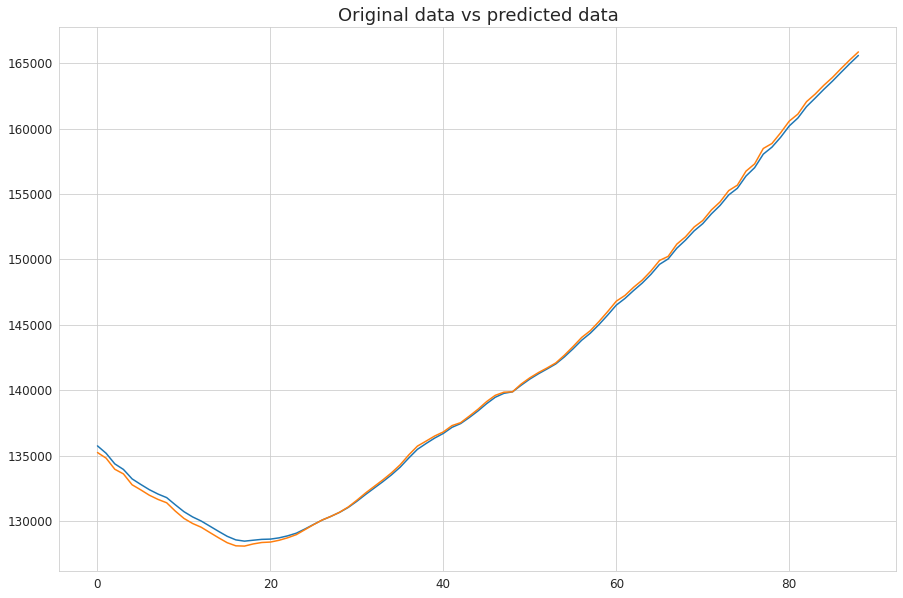

In [ ]:
# line plot of observed vs predicted
plt.figure(figsize=(15, 10))
plt.plot(raw_values[train_size:len(supervised_values)])
plt.plot(predictions)
plt.title('Original data vs predicted data', fontsize=18)
plt.show()

In [ ]:
# last value of our dataset
f = (raw_values[len(raw_values)-1]).reshape(-1, 1)
f 
# sklearn minmaxscaler for converting "f" to range to (-1,1)
scaler = MinMaxScaler(feature_range=(-1, 1))
# minmaxscaler fit
scaler = scaler.fit(f)
# let's transform
train = f.reshape(1, 1)
train_scaled = scaler.transform(train)

697.8947368421068

array([[166984.3803056]])

In [ ]:
# initial record
initial = train_scaled
# store prediction
prediction = []
# range 60 because we want the prediction for next 60 months
for i in range(60):
    # predict 
    yhat = forecast_lstm(lstm_model, 1, initial)
    # inverse prediction to it's original value
    yhat_inver = scaler.inverse_transform(yhat.reshape(1, 1))
    # append to our prediction variable
    prediction.append(yhat_inver)
    # re initial our initial variable so that it feed the current predicted value as input for forecast
    initial = np.array([yhat])

In [ ]:
prediction = np.concatenate(prediction, axis=0 ).tolist()
prediction = [item for sublist in prediction for item in sublist]
prediction = pd.DataFrame(prediction)

In [ ]:
rng = pd.date_range('2017-08-31 00:00:00', periods=60, freq='M')
rng = pd.DataFrame(rng)
prediction = pd.merge(rng, prediction, left_index=True, right_index=True, how='outer')
prediction.set_index('0_x')
prediction.columns = ['Date', 'ZHVI_AllHomes']
prediction

,0_y
0_x,
2017-08-31,166984.953125
2017-09-30,166984.968750
2017-10-31,166984.984375
2017-11-30,166985.000000
2017-12-31,166985.015625
2018-01-31,166985.015625
2018-02-28,166985.031250
2018-03-31,166985.031250
2018-04-30,166985.031250


,Date,ZHVI_AllHomes
0,2017-08-31,166984.953125
1,2017-09-30,166984.968750
2,2017-10-31,166984.984375
3,2017-11-30,166985.000000
4,2017-12-31,166985.015625
5,2018-01-31,166985.015625
6,2018-02-28,166985.031250
7,2018-03-31,166985.031250
8,2018-04-30,166985.031250
9,2018-05-31,166985.031250


In [ ]:
prediction

,Date,ZHVI_AllHomes
0,2017-08-31,166984.953125
1,2017-09-30,166984.968750
2,2017-10-31,166984.984375
3,2017-11-30,166985.000000
4,2017-12-31,166985.015625
5,2018-01-31,166985.015625
6,2018-02-28,166985.031250
7,2018-03-31,166985.031250
8,2018-04-30,166985.031250
9,2018-05-31,166985.031250


In [ ]:
original = pd.DataFrame({'Date':df_ZHVI_AllHomes.index, 'ZHVI_AllHomes':df_ZHVI_AllHomes.values})
original

,Date,ZHVI_AllHomes
0,1996-04-30,90529.347407
1,1996-05-31,91168.901438
2,1996-06-30,91539.879140
3,1996-07-31,91935.110701
4,1996-08-31,91349.656155
...,...,...
256,2017-08-31,163624.685908
257,2017-09-30,164298.370119
258,2017-10-31,164960.475382
259,2017-11-30,165588.590832


In [ ]:
frames = [original, prediction]
df_final = pd.concat(frames)
df_final.set_index(['Date'],inplace=True)

In [ ]:
df_final = pd.Series(df_final.ZHVI_AllHomes)

Text(0.5, 1.0, 'Zillow Home Value Index in different year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Zillow Home Value Index in per Square foot')

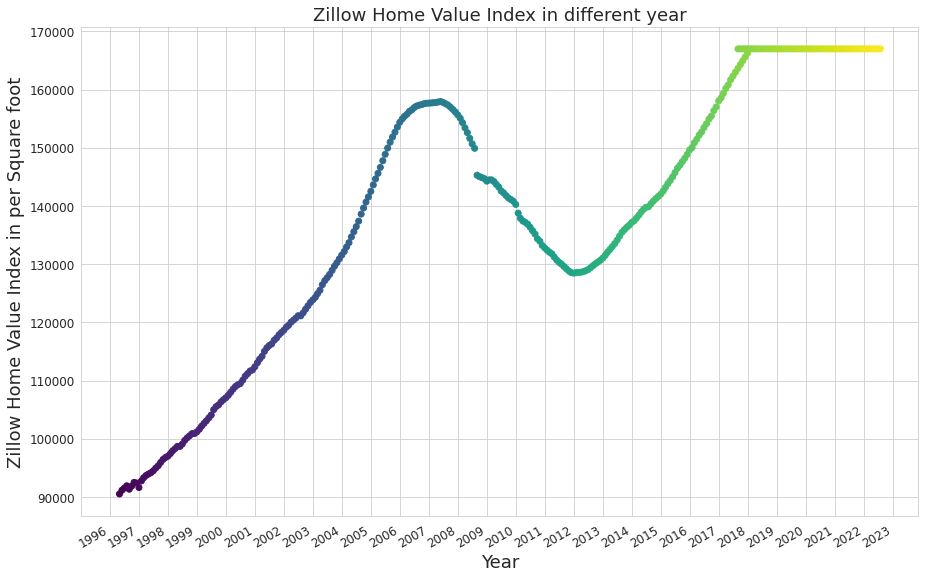

In [ ]:
# df_final.plot(figsize=(15, 5),x_compat=True)
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df_final.index, df_final, c=df_final.index, cmap='viridis')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.title('Zillow Home Value Index in different year', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Zillow Home Value Index in per Square foot', fontsize=18)
fig.autofmt_xdate()
plt.show()

## <font color=RoyalBlue>Conclusion<font>

From our short analysis, we can see that right before the 2008 crisis, the growth in price of real estate started to slow down from a previous exponential increase and at the same time, percentage of homes selling for a loss started to increase and also the ratio of homes sold as foreclosure. At the moment, we can see that Prices are back at pre 2008 levels, but from the data we can conclude that there is no risk of another crisis in the real estate market, since variables like homes sold as foreclosure, time to sell and homes selling for loss are down. we can see a linear trend in home value increase after 2008 slowdown and it kept on increasing exponentially back again.
we used four models to predict the Zillow Home Value index, 
1. Ridge Regression
2. Random Forest Regressor
3. XGBoost Regressor
4. Long Short term memory Recurrent Neural Net (LSTM RNN).

LSTM model performed well among all the 4 models in terms of low RMSE. LSTM works better with time series prediction. However, The prediction for next 5 year was steady state 166985 USD i.e. neither increase or decrease which is not quite right. It still give us some idea about the home value for next 5 years will not go down. There are many factors which have influenced the home value in US since 2020 like supply chain issues, rise in lumber cost, mortagage rates down with kick start of pandemic, increase in labour cost. without these data, it is quite difficult to predict the Home Value in future year accurately. 